# Exploring the Dynamics of Depression with Actigraphy-Based Time Series Data and Demographic Factors**




In [ ]:
from zipfile import ZipFile
file_name = '/content/data.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


### **Database:** [The Depression Dataset](https://www.kaggle.com/datasets/arashnic/the-depression-dataset)

Contents:

The dataset contains two folders (one containing the data for the control group and the other for the condition group) and a scores.csv file. The two folders contain CSV files for each patient's actigraph data collected over time. The columns are:
timestamp (one-minute intervals),
date (date of measurement), and
activity (activity measurement from the actigraph watch).

The scores file contains the following columns; number (patient identifier), days (number of days of measurements), gender (female or male), age (age in age groups), afftype (bipolar II, unipolar depressive, bipolar I), melanch (melancholia or no melancholia), inpatient (inpatient, or outpatient), edu (education grouped in years), marriage (married or cohabiting, or single), work (working or studying, or unemployed/sick leave/pension), madrs1 (MADRS score when measurement started), madrs2 (MADRS scores when measurement stopped).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Scores Data**

In [ ]:
scores = pd.read_csv('/content/data/scores.csv')

In [ ]:
scores

number  days  gender    age  afftype  melanch  inpatient    edu  \
0    condition_1    11       2  35-39      2.0      2.0        2.0   6-10   
1    condition_2    18       2  40-44      1.0      2.0        2.0   6-10   
2    condition_3    13       1  45-49      2.0      2.0        2.0   6-10   
3    condition_4    13       2  25-29      2.0      2.0        2.0  11-15   
4    condition_5    13       2  50-54      2.0      2.0        2.0  11-15   
5    condition_6     7       1  35-39      2.0      2.0        2.0   6-10   
6    condition_7    11       1  20-24      1.0      NaN        2.0  11-15   
7    condition_8     5       2  25-29      2.0      NaN        2.0  11-15   
8    condition_9    13       2  45-49      1.0      NaN        2.0   6-10   
9   condition_10     9       2  45-49      2.0      2.0        2.0   6-10   
10  condition_11    14       1  45-49      2.0      2.0        2.0   6-10   
11  condition_12    12       2  40-44      1.0      2.0        2.0   6-10   
12  condition_13    14       2  35-39      1.0      2.0        2.0  11-15   
13  condition_14    14       1  60-64      1.0      2.0        2.0   6-10   
14  condition_15    13       2  55-59      2.0      2.0        2.0  11-15   
15  condition_16    16       1  45-49      2.0      2.0        2.0  11-15   
16  condition_17    13       1  50-54      1.0      2.0        2.0   6-10   
17  condition_18    13       2  40-44      3.0      2.0        2.0  11-15   
18  condition_19    13       2  50-54      2.0      2.0        1.0  16-20   
19  condition_20    13       1  30-34      2.0      1.0        1.0   6-10   
20  condition_21    13       2  35-39      2.0      2.0        1.0   6-10   
21  condition_22    14       1  65-69      2.0      2.0        1.0          
22  condition_23    16       1  30-34      2.0      2.0        1.0  16-20   
23     control_1     8       2  25-29      NaN      NaN        NaN    NaN   
24     control_2    20       1  30-34      NaN      NaN        NaN          
25     control_3    12       2  30-34      NaN      NaN        NaN          
26     control_4    13       1  25-29      NaN      NaN        NaN          
27     control_5    13       1  30-34      NaN      NaN        NaN          
28     control_6    13       1  25-29      NaN      NaN        NaN          
29     control_7    13       1  20-24      NaN      NaN        NaN          
30     control_8    13       2  40-44      NaN      NaN        NaN          
31     control_9    13       2  30-34      NaN      NaN        NaN          
32    control_10     8       1  30-34      NaN      NaN        NaN          
33    control_11    13       1  45-49      NaN      NaN        NaN          
34    control_12    14       1  60-64      NaN      NaN        NaN          
35    control_13    13       1  50-54      NaN      NaN        NaN    NaN   
36    control_14    13       1  50-54      NaN      NaN        NaN          
37    control_15    11       1  45-49      NaN      NaN        NaN          
38    control_16    13       2  40-44      NaN      NaN        NaN          
39    control_17     9       1  45-49      NaN      NaN        NaN          
40    control_18    13       2  20-24      NaN      NaN        NaN          
41    control_19    13       1  50-54      NaN      NaN        NaN          
42    control_20    13       1  35-39      NaN      NaN        NaN          
43    control_21     8       1  50-54      NaN      NaN        NaN          
44    control_22    13       1  25-29      NaN      NaN        NaN          
45    control_23    13       1  20-24      NaN      NaN        NaN          
46    control_24    13       2  20-24      NaN      NaN        NaN          
47    control_25    13       1  65-69      NaN      NaN        NaN          
48    control_26    13       1  35-39      NaN      NaN        NaN          
49    control_27    13       2  50-54      NaN      NaN        NaN          
50    control_28    16       2  45-49      NaN      NaN        NaN          
51    

## **EDA on Scores Data**

In [ ]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   number     55 non-null     object 
 1   days       55 non-null     int64  
 2   gender     55 non-null     int64  
 3   age        55 non-null     object 
 4   afftype    23 non-null     float64
 5   melanch    20 non-null     float64
 6   inpatient  23 non-null     float64
 7   edu        53 non-null     object 
 8   marriage   23 non-null     float64
 9   work       23 non-null     float64
 10  madrs1     23 non-null     float64
 11  madrs2     23 non-null     float64
dtypes: float64(7), int64(2), object(3)
memory usage: 5.3+ KB


In [ ]:
scores.describe().T

count       mean       std   min   25%   50%   75%   max
days        55.0  12.600000  2.491467   5.0  13.0  13.0  13.0  20.0
gender      55.0   1.454545  0.502519   1.0   1.0   1.0   2.0   2.0
afftype     23.0   1.739130  0.540824   1.0   1.0   2.0   2.0   3.0
melanch     20.0   1.950000  0.223607   1.0   2.0   2.0   2.0   2.0
inpatient   23.0   1.782609  0.421741   1.0   2.0   2.0   2.0   2.0
marriage    23.0   1.521739  0.510754   1.0   1.0   2.0   2.0   2.0
work        23.0   1.869565  0.344350   1.0   2.0   2.0   2.0   2.0
madrs1      23.0  22.739130  4.797892  13.0  18.5  24.0  26.0  29.0
madrs2      23.0  20.000000  4.729021  11.0  16.0  21.0  24.5  28.0

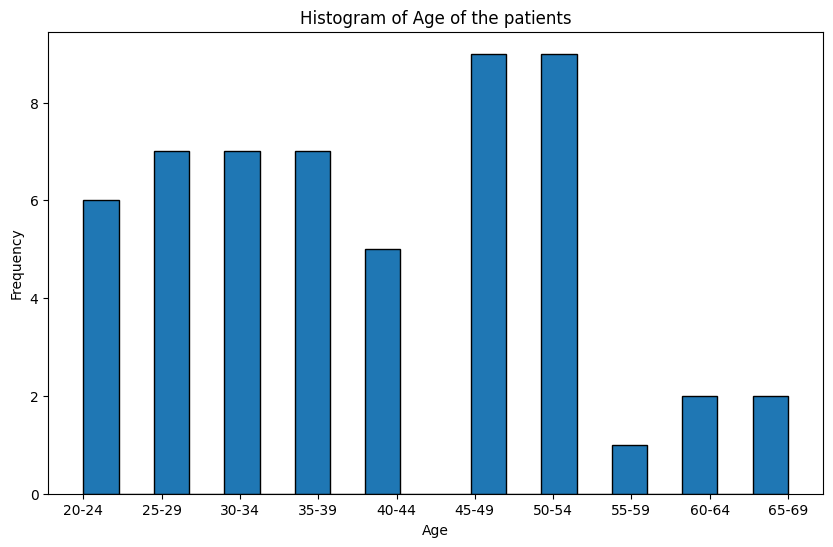

In [ ]:
scores_sorted = scores.sort_values(by = 'age')

plt.figure(figsize = (10,6))
plt.hist(scores_sorted['age'], bins = 20, edgecolor = 'black')
plt.title('Histogram of Age of the patients')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

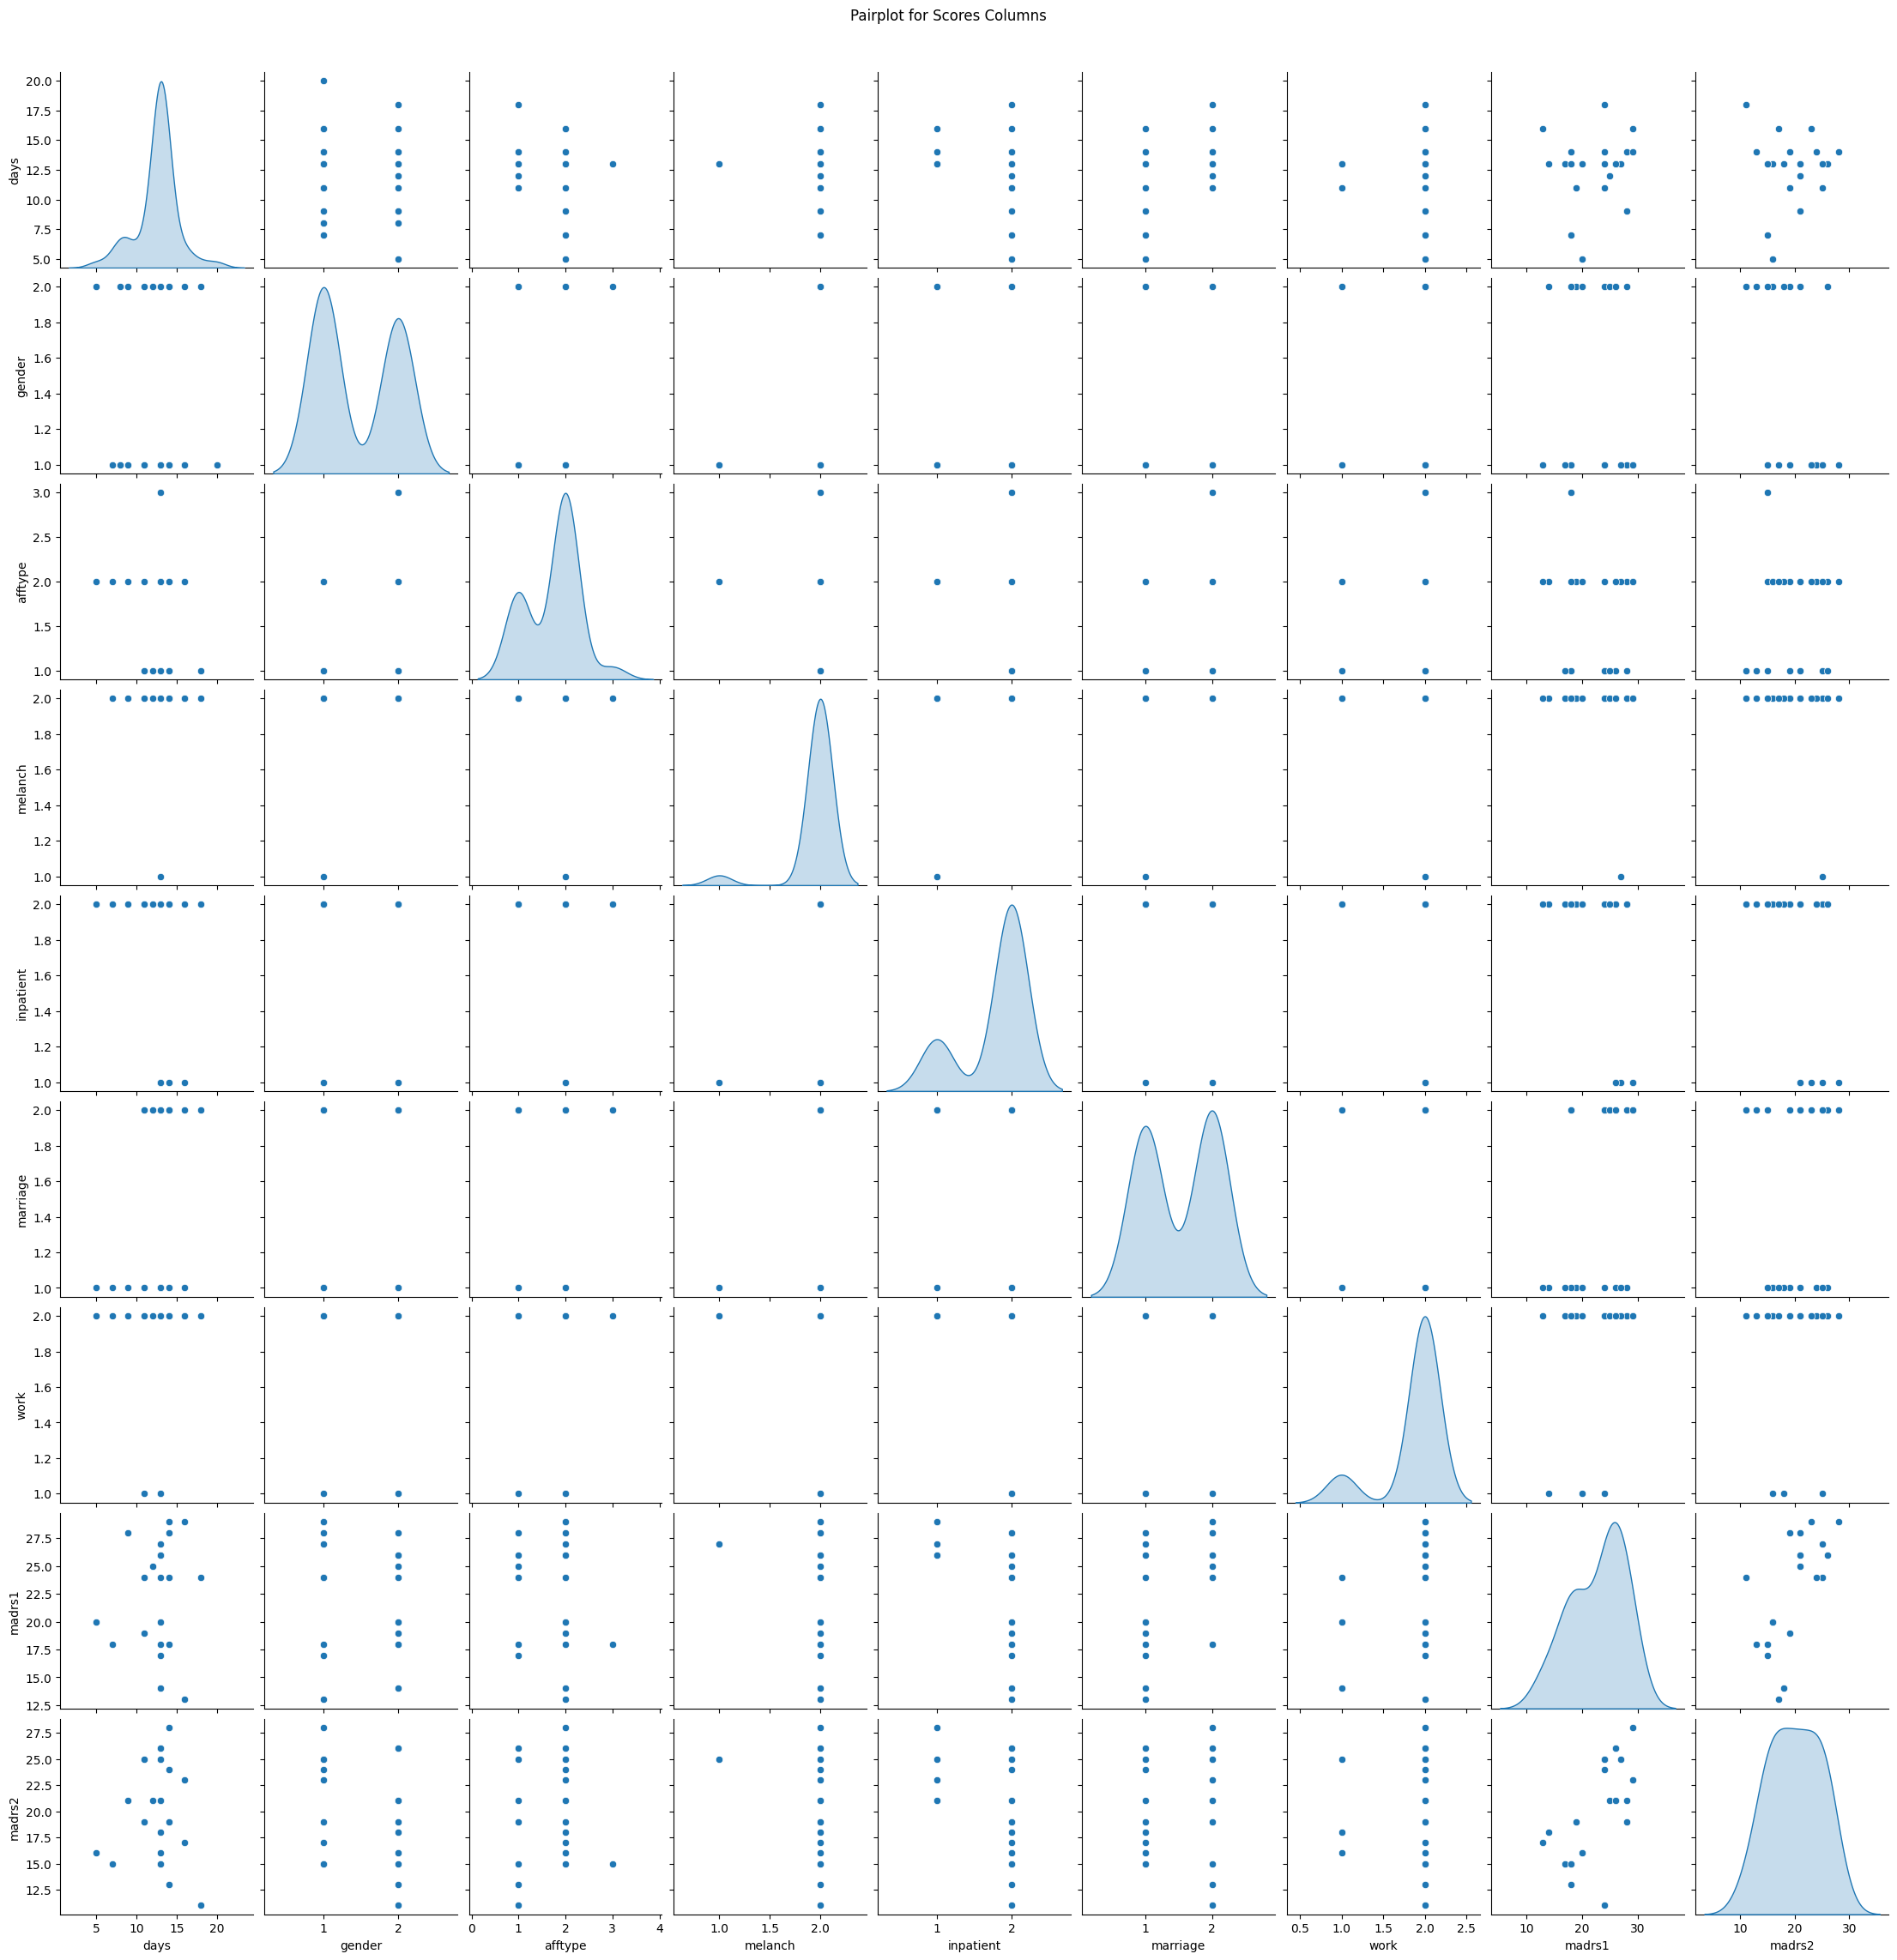

In [ ]:
sns.pairplot(scores, diag_kind='kde')
plt.suptitle('Pairplot for Scores Columns', y=1.02)
plt.show()

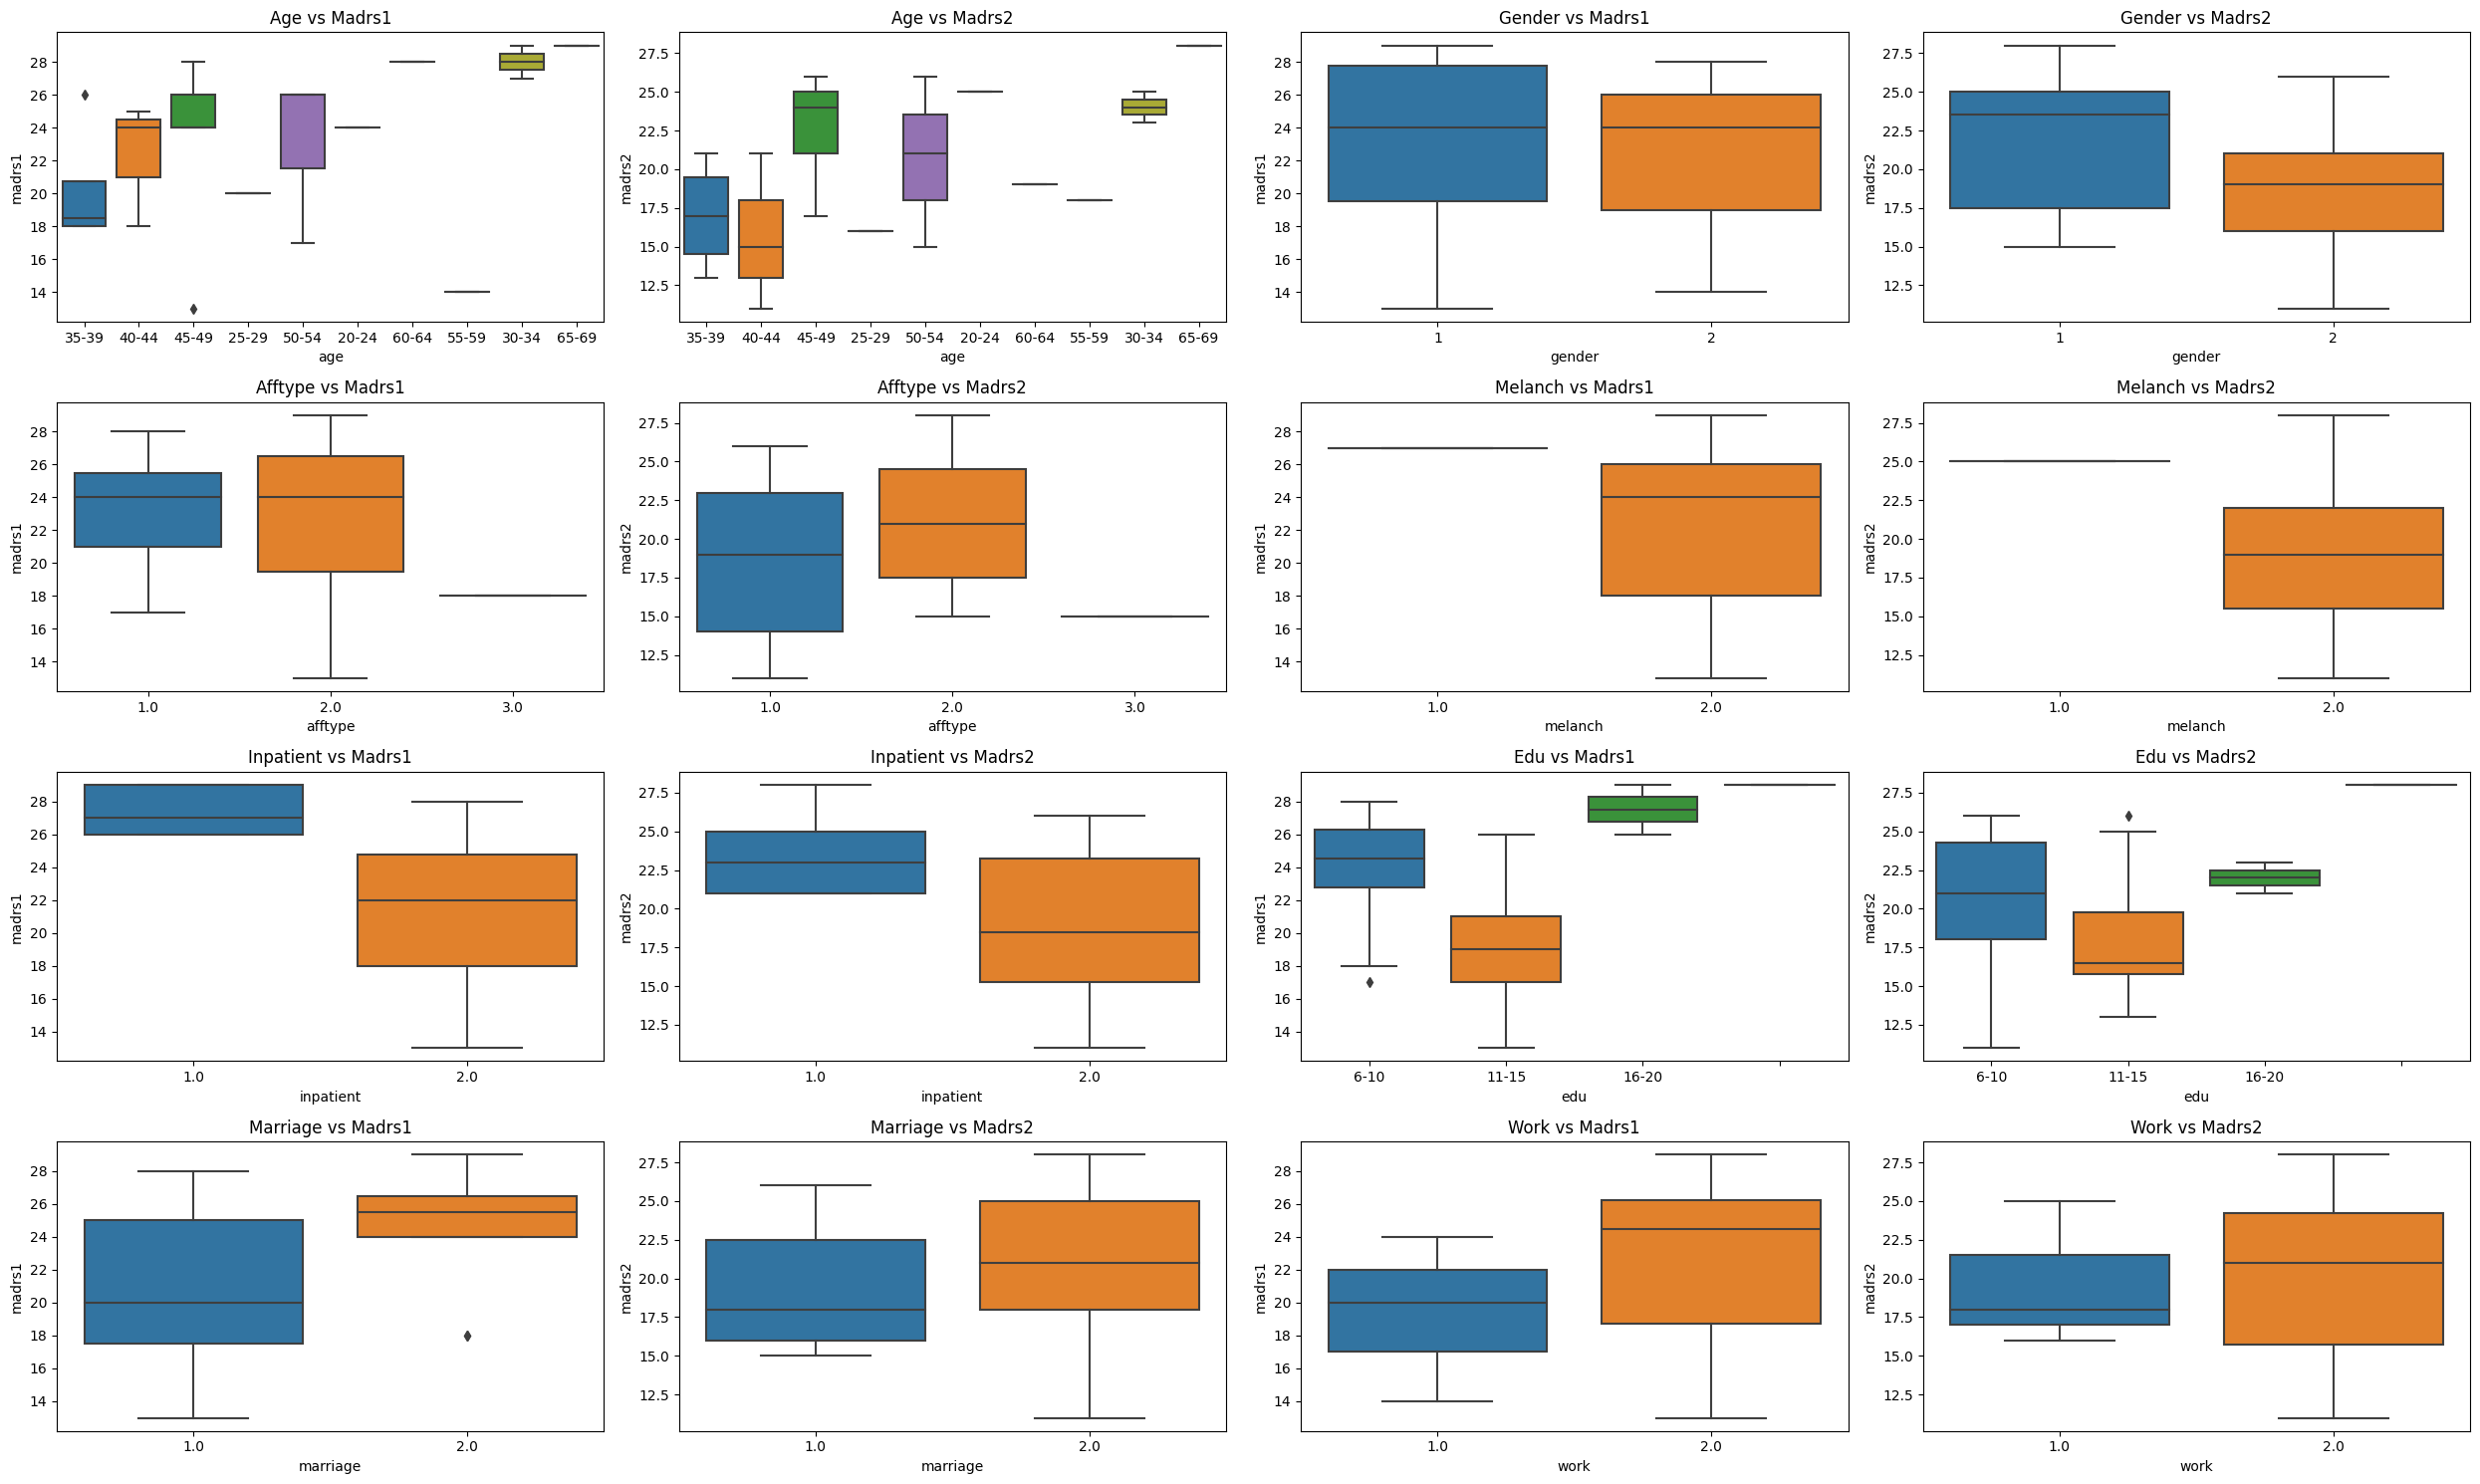

In [ ]:
# Define the variables and their combinations for plotting
plot_vars = ['age', 'gender', 'afftype', 'melanch', 'inpatient', 'edu', 'marriage', 'work']
madrs_vars = ['madrs1', 'madrs2']

# Set up the subplots
fig, axes = plt.subplots(4, 4, figsize=(25, 15))
axes = axes.flatten()

# Plot boxplots for each combination
for i, var in enumerate(plot_vars):
    for j, madrs_var in enumerate(madrs_vars):
        sns.boxplot(x=var, y=madrs_var, data=scores, ax=axes[i*len(madrs_vars) + j])
        axes[i*len(madrs_vars) + j].set_title(f'{var.capitalize()} vs {madrs_var.capitalize()}')

# Remove empty subplots
for k in range(len(plot_vars) * len(madrs_vars), len(axes)):
    fig.delaxes(axes[k])

plt.tight_layout()
plt.show()

## Splitting the Scores Data to Condition and Control Scores

In [ ]:
condition_scores = scores[scores['number'].str.contains('condition')].copy()
control_scores = scores[scores['number'].str.contains('control')].copy()

In [ ]:
condition_scores.head()

number  days  gender    age  afftype  melanch  inpatient    edu  \
0  condition_1    11       2  35-39      2.0      2.0        2.0   6-10   
1  condition_2    18       2  40-44      1.0      2.0        2.0   6-10   
2  condition_3    13       1  45-49      2.0      2.0        2.0   6-10   
3  condition_4    13       2  25-29      2.0      2.0        2.0  11-15   
4  condition_5    13       2  50-54      2.0      2.0        2.0  11-15   

   marriage  work  madrs1  madrs2  
0       1.0   2.0    19.0    19.0  
1       2.0   2.0    24.0    11.0  
2       2.0   2.0    24.0    25.0  
3       1.0   1.0    20.0    16.0  
4       2.0   2.0    26.0    26.0

## **EDA on Condition Scores**

In [ ]:
condition_scores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 22
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   number     23 non-null     object 
 1   days       23 non-null     int64  
 2   gender     23 non-null     int64  
 3   age        23 non-null     object 
 4   afftype    23 non-null     float64
 5   melanch    20 non-null     float64
 6   inpatient  23 non-null     float64
 7   edu        23 non-null     object 
 8   marriage   23 non-null     float64
 9   work       23 non-null     float64
 10  madrs1     23 non-null     float64
 11  madrs2     23 non-null     float64
dtypes: float64(7), int64(2), object(3)
memory usage: 2.3+ KB


In [ ]:
condition_scores.describe().T

count       mean       std   min   25%   50%   75%   max
days        23.0  12.652174  2.773391   5.0  12.5  13.0  14.0  18.0
gender      23.0   1.565217  0.506870   1.0   1.0   2.0   2.0   2.0
afftype     23.0   1.739130  0.540824   1.0   1.0   2.0   2.0   3.0
melanch     20.0   1.950000  0.223607   1.0   2.0   2.0   2.0   2.0
inpatient   23.0   1.782609  0.421741   1.0   2.0   2.0   2.0   2.0
marriage    23.0   1.521739  0.510754   1.0   1.0   2.0   2.0   2.0
work        23.0   1.869565  0.344350   1.0   2.0   2.0   2.0   2.0
madrs1      23.0  22.739130  4.797892  13.0  18.5  24.0  26.0  29.0
madrs2      23.0  20.000000  4.729021  11.0  16.0  21.0  24.5  28.0

In [ ]:
condition_scores['melanch'].fillna(1.0, inplace=True)

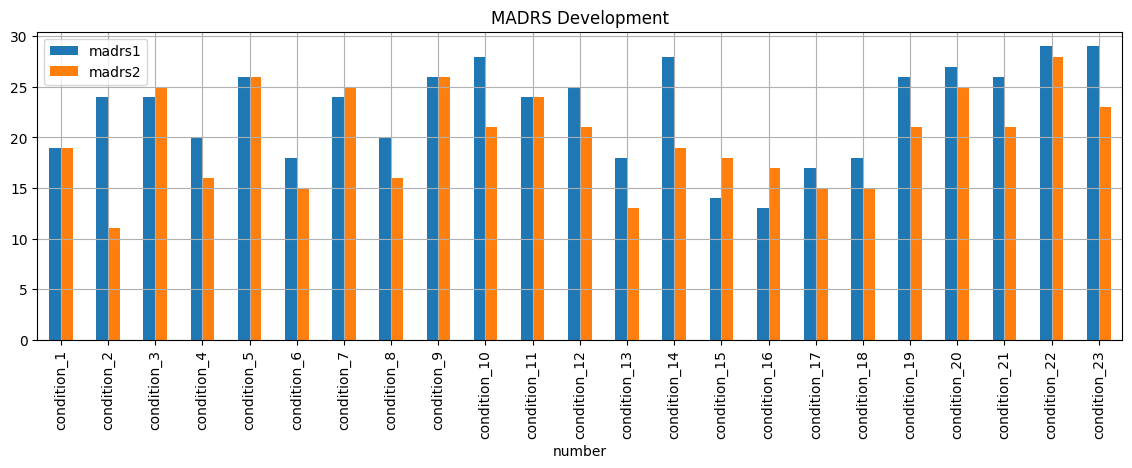

In [ ]:
# barplot of MADRS scores (before/after)
temp_plot_paras = plt.rcParams['figure.figsize']

plt.rcParams['figure.figsize'] = (14,4)
condition_scores.plot(x='number', y=['madrs1','madrs2'], kind='bar')
plt.title('MADRS Development')
plt.grid()
plt.show()

plt.rcParams['figure.figsize'] = temp_plot_paras

<ipython-input-16-71509c966de4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = condition_scores.corr()


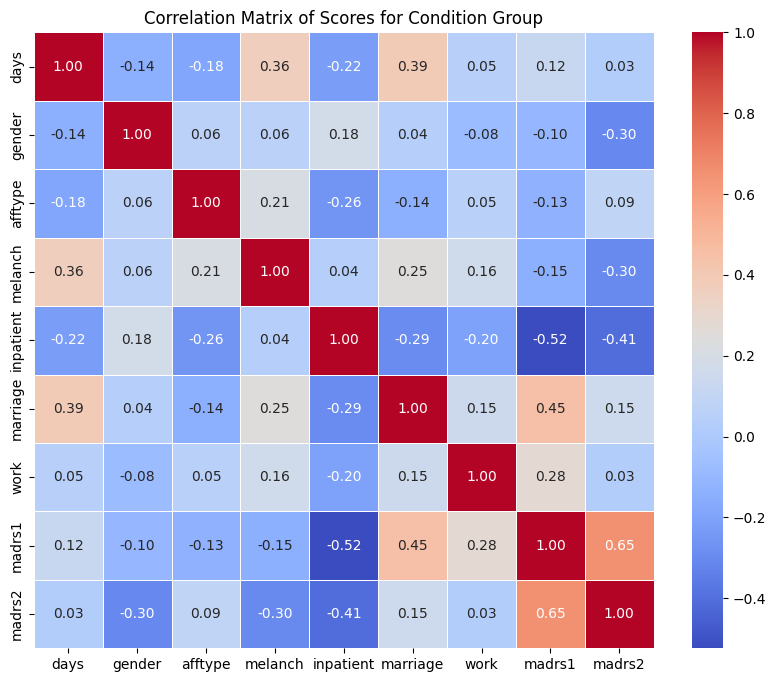

In [ ]:
# Correlation matrix
correlation_matrix = condition_scores.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Scores for Condition Group')
plt.show()

## **Control Scores Data**

In [ ]:
control_scores.head()

number  days  gender    age  afftype  melanch  inpatient  edu  \
23  control_1     8       2  25-29      NaN      NaN        NaN  NaN   
24  control_2    20       1  30-34      NaN      NaN        NaN        
25  control_3    12       2  30-34      NaN      NaN        NaN        
26  control_4    13       1  25-29      NaN      NaN        NaN        
27  control_5    13       1  30-34      NaN      NaN        NaN        

    marriage  work  madrs1  madrs2  
23       NaN   NaN     NaN     NaN  
24       NaN   NaN     NaN     NaN  
25       NaN   NaN     NaN     NaN  
26       NaN   NaN     NaN     NaN  
27       NaN   NaN     NaN     NaN

In [ ]:
control_scores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 23 to 54
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   number     32 non-null     object 
 1   days       32 non-null     int64  
 2   gender     32 non-null     int64  
 3   age        32 non-null     object 
 4   afftype    0 non-null      float64
 5   melanch    0 non-null      float64
 6   inpatient  0 non-null      float64
 7   edu        30 non-null     object 
 8   marriage   0 non-null      float64
 9   work       0 non-null      float64
 10  madrs1     0 non-null      float64
 11  madrs2     0 non-null      float64
dtypes: float64(7), int64(2), object(3)
memory usage: 3.2+ KB


In [ ]:
control_scores.describe().T

count     mean       std  min   25%   50%   75%   max
days        32.0  12.5625  2.313181  8.0  13.0  13.0  13.0  20.0
gender      32.0   1.3750  0.491869  1.0   1.0   1.0   2.0   2.0
afftype      0.0      NaN       NaN  NaN   NaN   NaN   NaN   NaN
melanch      0.0      NaN       NaN  NaN   NaN   NaN   NaN   NaN
inpatient    0.0      NaN       NaN  NaN   NaN   NaN   NaN   NaN
marriage     0.0      NaN       NaN  NaN   NaN   NaN   NaN   NaN
work         0.0      NaN       NaN  NaN   NaN   NaN   NaN   NaN
madrs1       0.0      NaN       NaN  NaN   NaN   NaN   NaN   NaN
madrs2       0.0      NaN       NaN  NaN   NaN   NaN   NaN   NaN

## **Actigraph Data**

In [ ]:
# List to store processed DataFrames
conditions_df = []

# Process each CSV file
for i in range(1, 24):
    file_path = f'/content/data/condition/condition_{i}.csv'
    condition = pd.read_csv(file_path, parse_dates=['timestamp'])
    if 'timestamp' in condition.columns:
        condition['ts'] = condition['timestamp']
        condition = condition.set_index('timestamp')

    condition['patient'] = f'condition_{i}'
    condition['day'] = condition.index.day_of_week

    condition['mean_activity'] = condition['activity'].resample('H').mean()
    condition['zero_count'] = condition['activity'].resample('H').apply(lambda x: (x == 0).sum())
    condition = condition.dropna()

    # Append the processed DataFrame to the list
    conditions_df.append(condition[['patient', 'ts', 'day', 'mean_activity', 'zero_count']])

# Concatenate all DataFrames into one
cond_result_df = pd.concat(conditions_df, ignore_index=True)

# Display the resulting DataFrame
cond_result_df

patient                  ts  day  mean_activity  zero_count
0      condition_1 2003-05-07 12:00:00    2     346.550000         2.0
1      condition_1 2003-05-07 13:00:00    2     284.566667         5.0
2      condition_1 2003-05-07 14:00:00    2     279.183333         6.0
3      condition_1 2003-05-07 15:00:00    2     218.783333         8.0
4      condition_1 2003-05-07 16:00:00    2     238.550000         9.0
...            ...                 ...  ...            ...         ...
9198  condition_23 2002-06-28 05:00:00    4       0.000000        60.0
9199  condition_23 2002-06-28 06:00:00    4       0.000000        60.0
9200  condition_23 2002-06-28 07:00:00    4       0.000000        60.0
9201  condition_23 2002-06-28 08:00:00    4       0.000000        60.0
9202  condition_23 2002-06-28 09:00:00    4     171.755556        23.0

[9203 rows x 5 columns]

In [ ]:
# List to store processed DataFrames
controls_df = []

# Process each CSV file
for i in range(1, 24):
    file_path = f'/content/data/control/control_{i}.csv'
    control = pd.read_csv(file_path, parse_dates=['timestamp'])
    if 'timestamp' in control.columns:
        control['ts'] = control['timestamp']
        control = control.set_index('timestamp')

    control['patient'] = f'control_{i}'
    control['day'] = control.index.day_of_week

    control['mean_activity'] = control['activity'].resample('H').mean()
    control['zero_count'] = control['activity'].resample('H').apply(lambda x: (x == 0).sum())
    control = control.dropna()

    # Append the processed DataFrame to the list
    controls_df.append(control[['patient', 'ts', 'day', 'mean_activity', 'zero_count']])

# Concatenate all DataFrames into one
cont_result_df = pd.concat(controls_df, ignore_index=True)

# Display the resulting DataFrame
cont_result_df

patient                  ts  day  mean_activity  zero_count
0       control_1 2003-03-18 15:00:00    1     156.483333         2.0
1       control_1 2003-03-18 16:00:00    1     264.550000         7.0
2       control_1 2003-03-18 17:00:00    1    1105.133333         0.0
3       control_1 2003-03-18 18:00:00    1     338.633333         1.0
4       control_1 2003-03-18 19:00:00    1     567.833333        22.0
...           ...                 ...  ...            ...         ...
12487  control_23 2004-03-03 06:00:00    2       2.000000         0.0
12488  control_23 2004-03-03 07:00:00    2       2.000000         0.0
12489  control_23 2004-03-03 08:00:00    2      21.416667         0.0
12490  control_23 2004-03-03 09:00:00    2      94.950000         0.0
12491  control_23 2004-03-03 10:00:00    2       5.823529        10.0

[12492 rows x 5 columns]

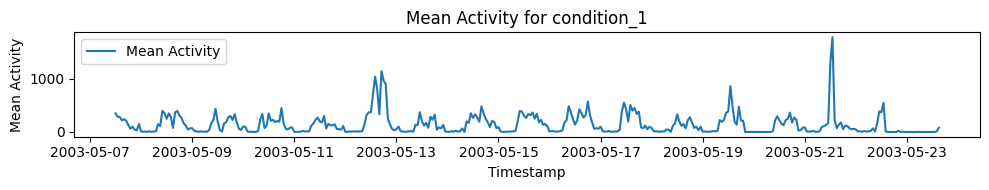

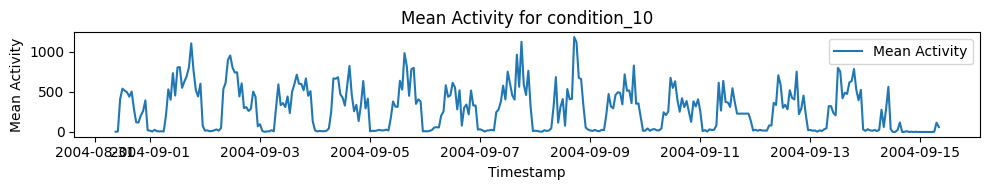

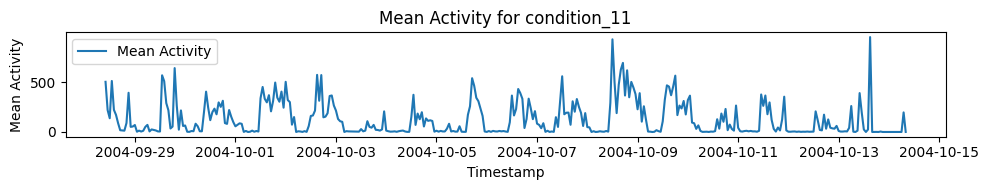

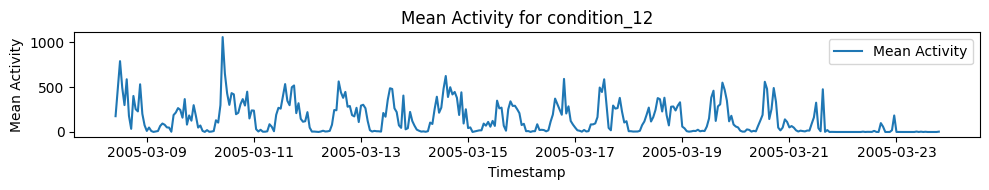

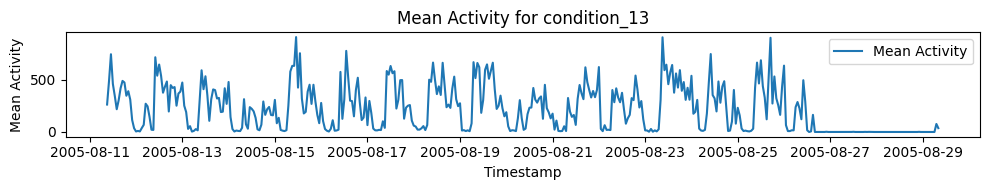

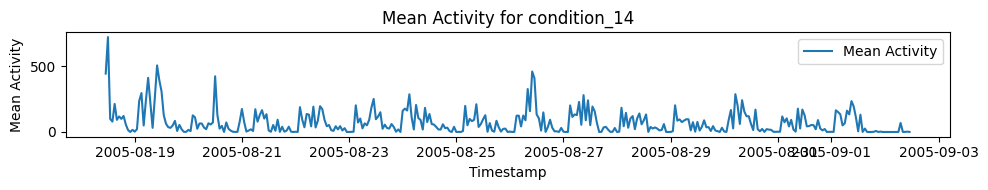

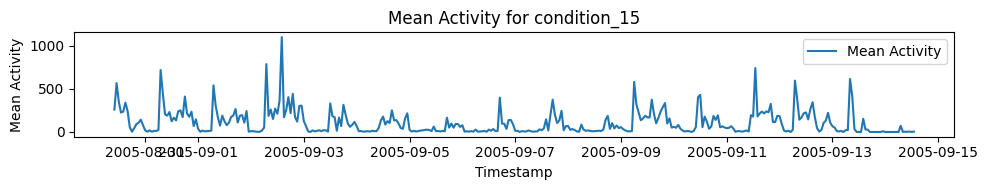

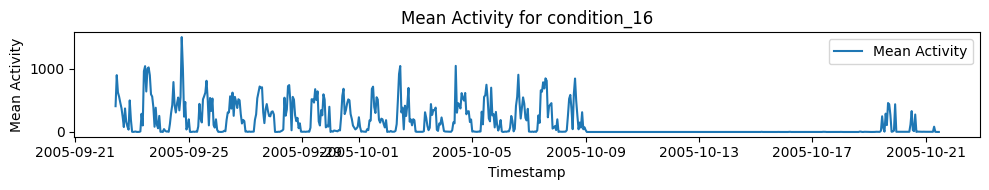

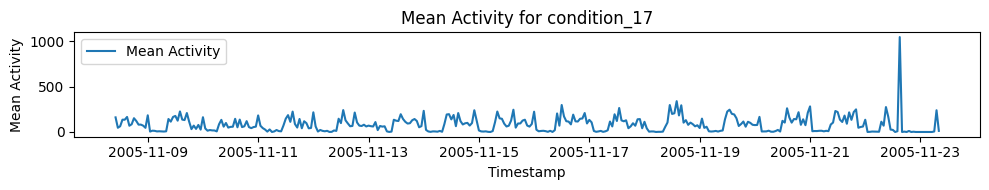

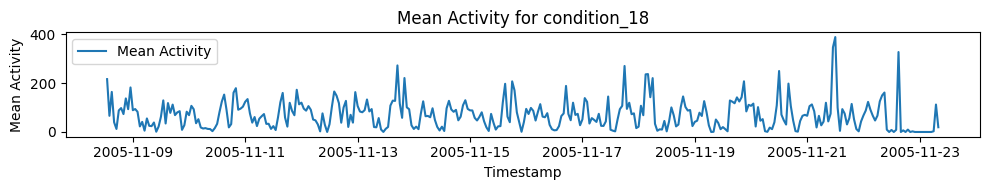

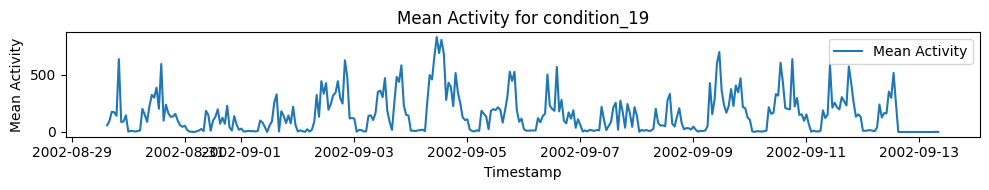

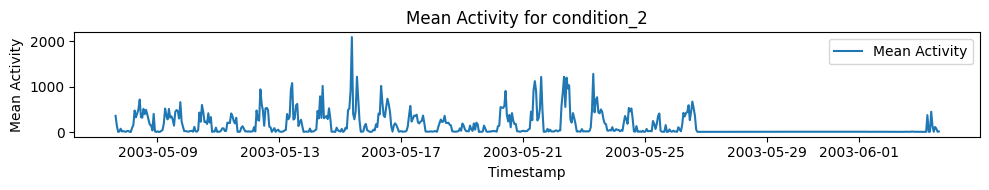

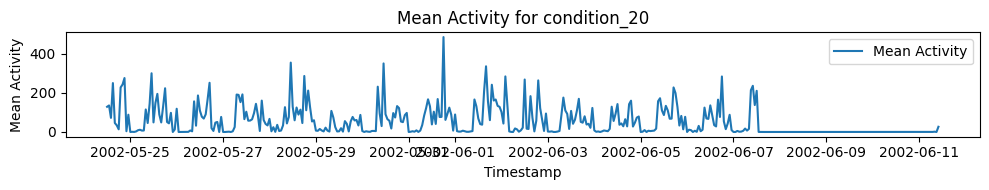

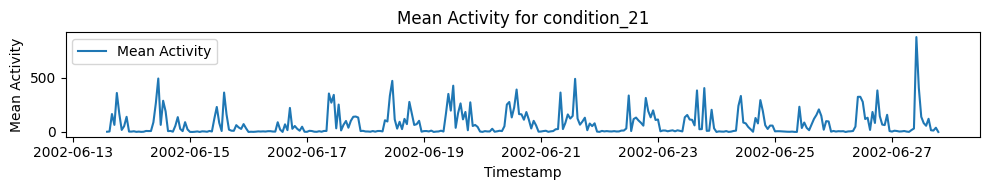

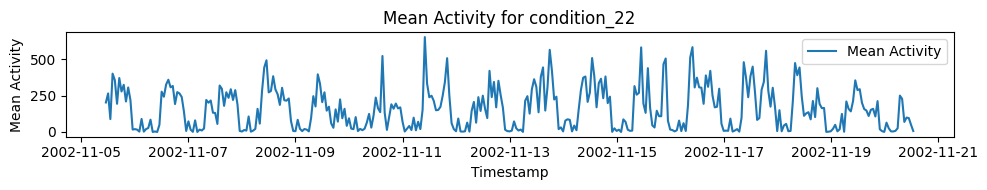

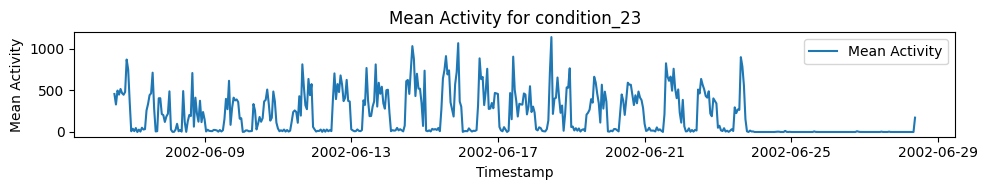

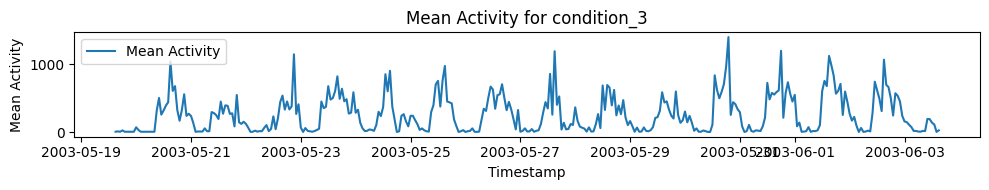

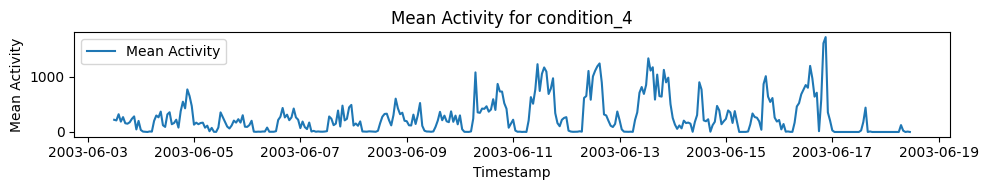

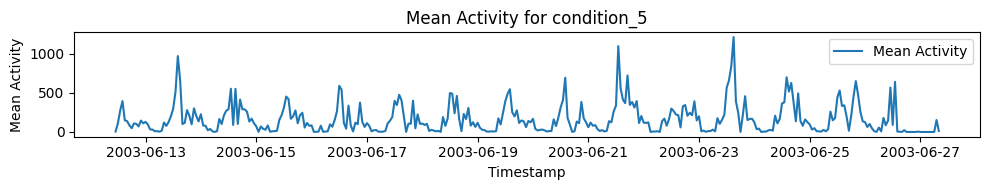

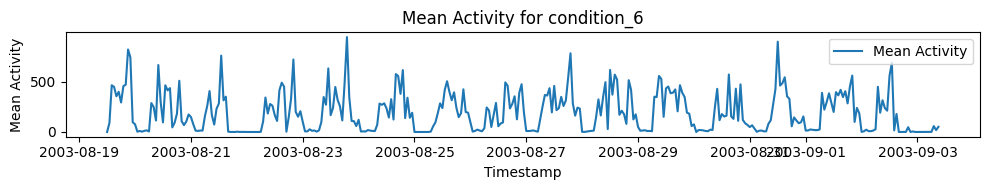

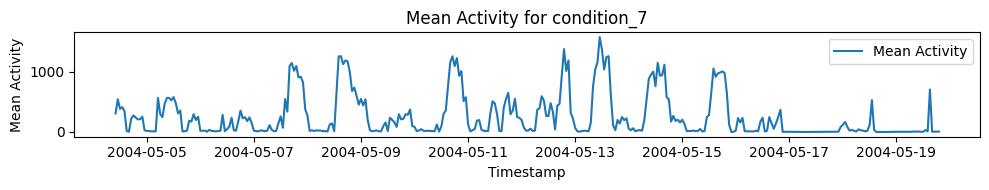

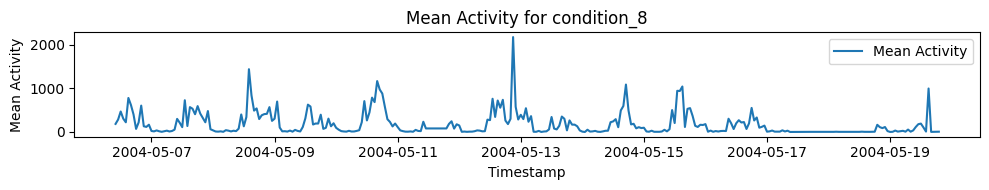

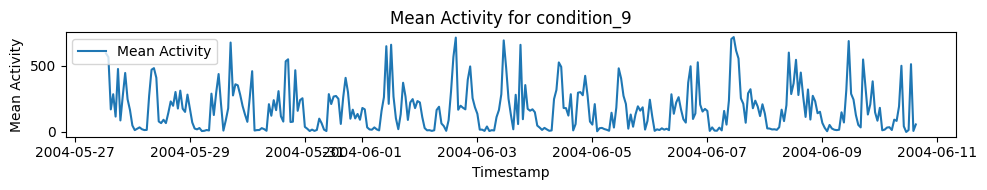

In [ ]:
for patient, data in cond_result_df.groupby('patient'):
    plt.figure(figsize=(10, 2))

    # Plot 'mean_activity'
    plt.plot(data['ts'], data['mean_activity'], label='Mean Activity')
    plt.title(f'Mean Activity for {patient}')
    plt.xlabel('Timestamp')
    plt.ylabel('Mean Activity')
    plt.legend()

    plt.tight_layout()
    plt.show()

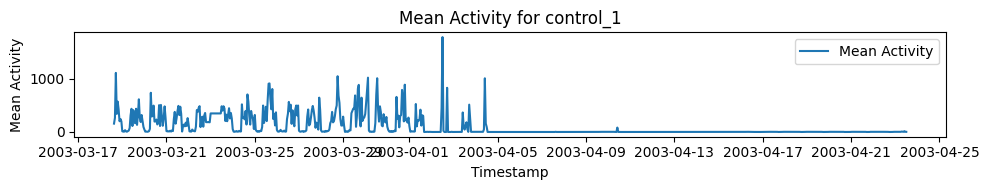

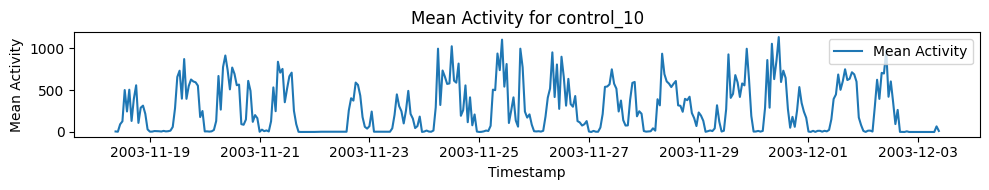

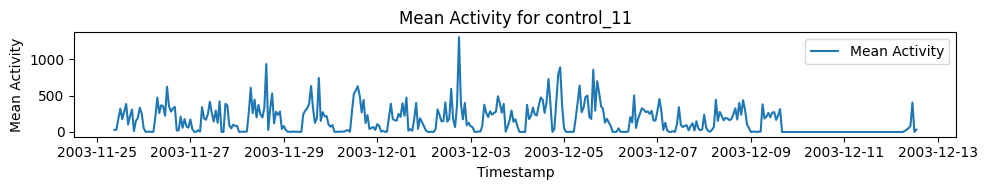

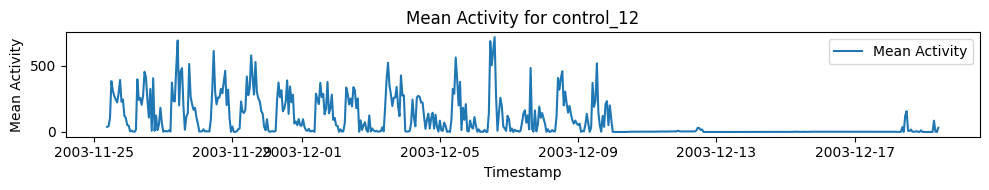

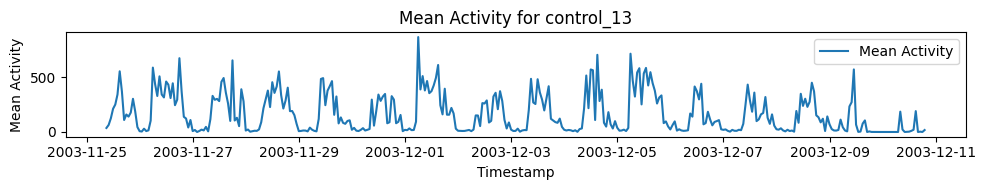

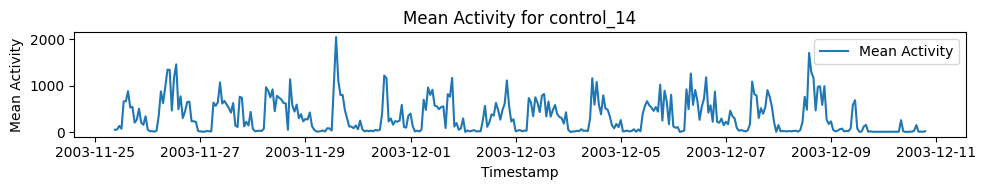

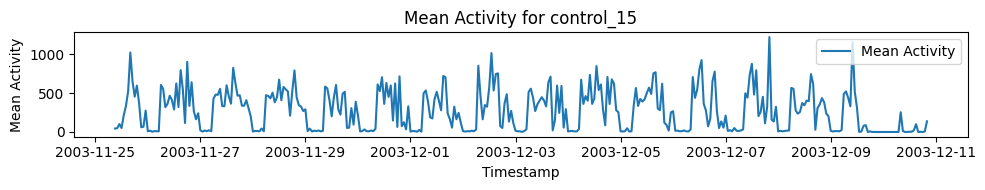

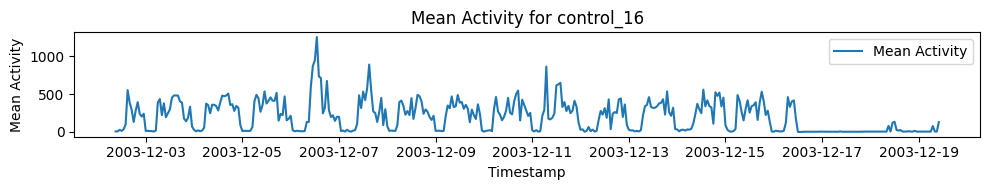

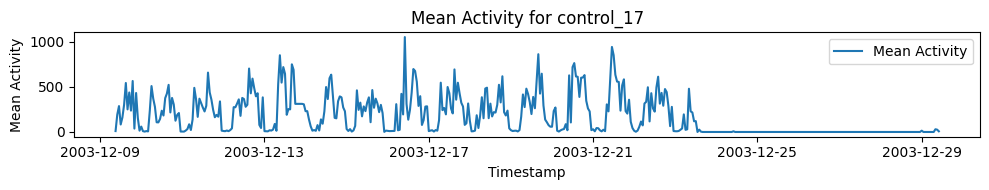

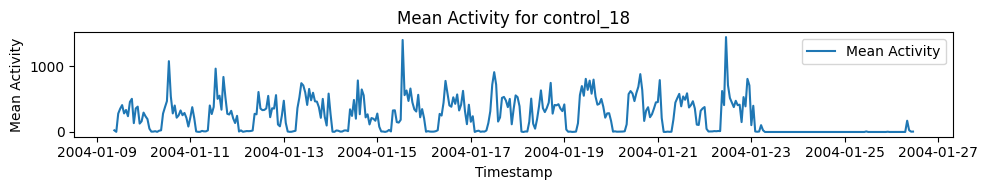

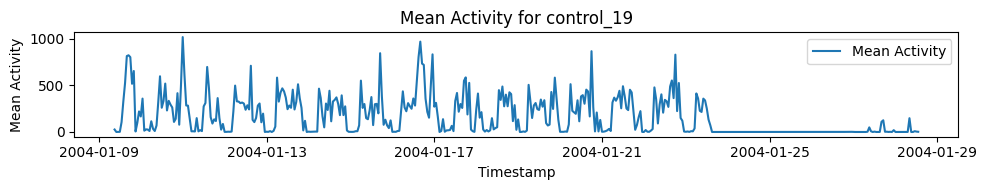

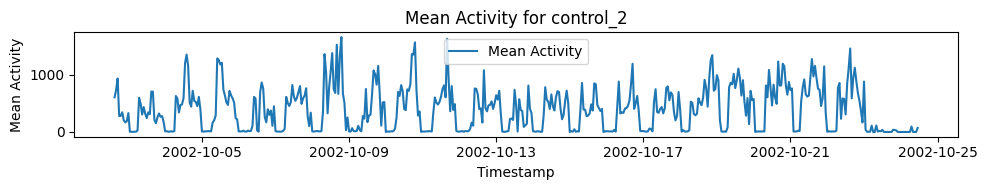

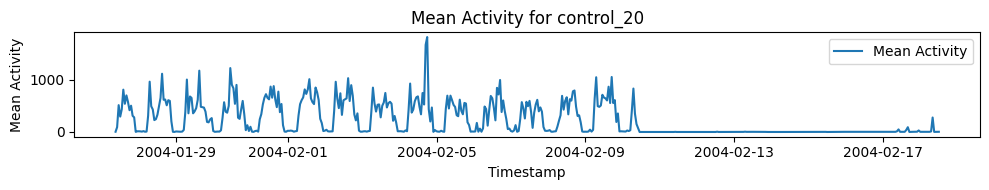

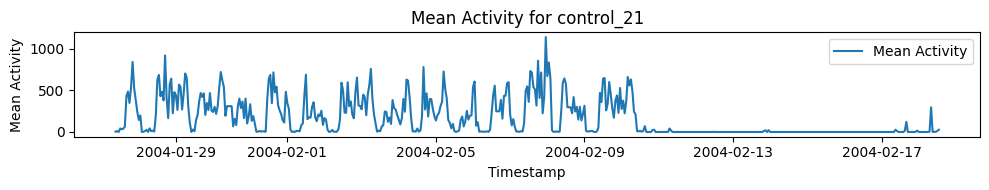

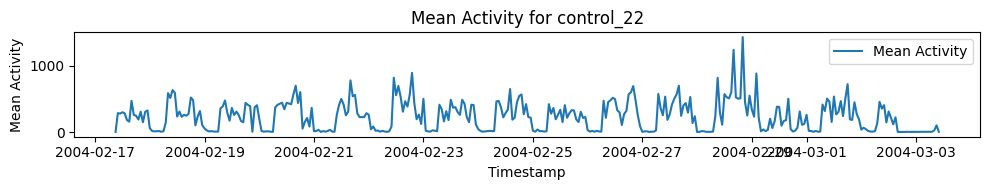

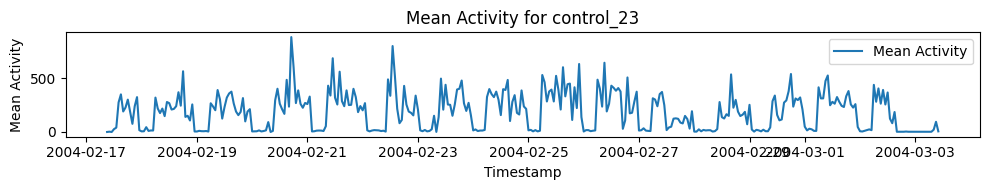

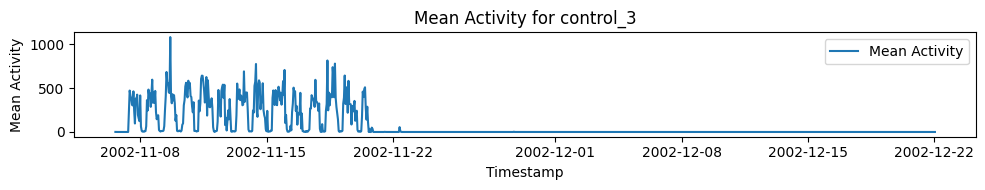

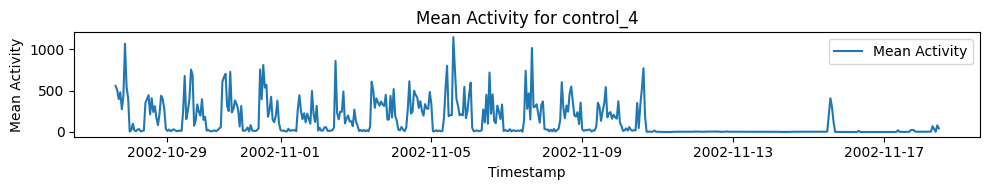

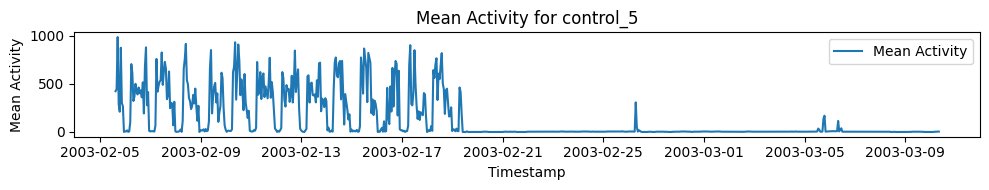

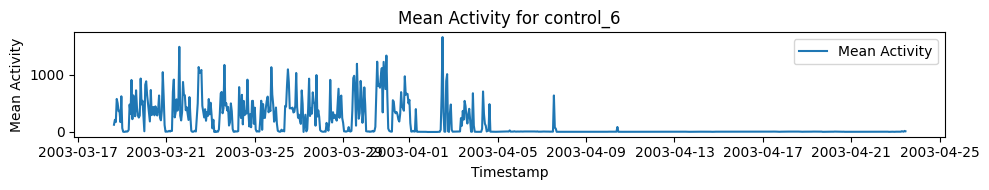

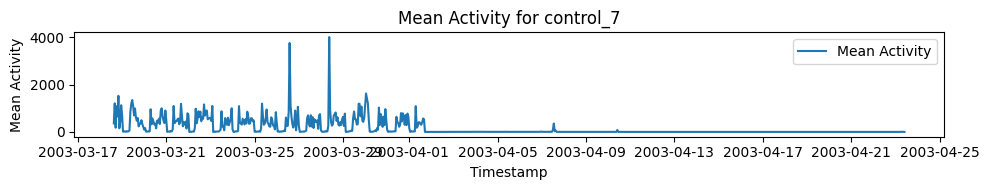

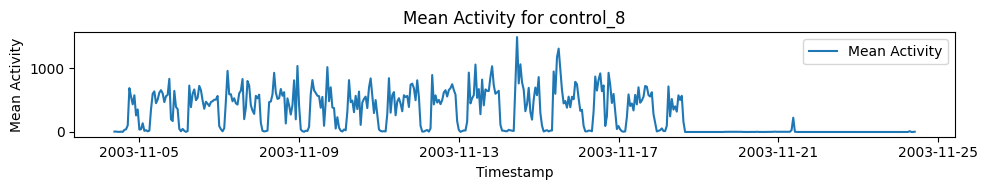

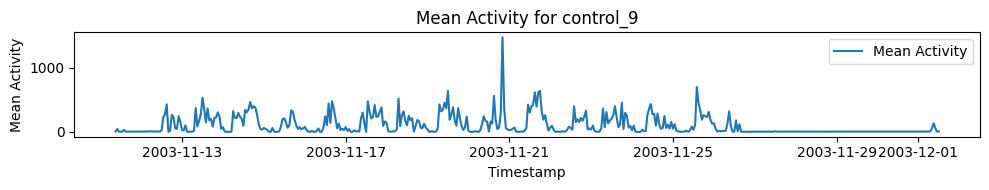

In [ ]:
for patient, data in cont_result_df.groupby('patient'):
    plt.figure(figsize=(10, 2))

    # Plot 'mean_activity'
    plt.plot(data['ts'], data['mean_activity'], label='Mean Activity')
    plt.title(f'Mean Activity for {patient}')
    plt.xlabel('Timestamp')
    plt.ylabel('Mean Activity')
    plt.legend()

    plt.tight_layout()
    plt.show()

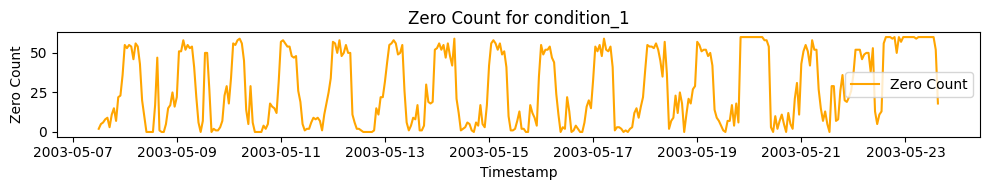

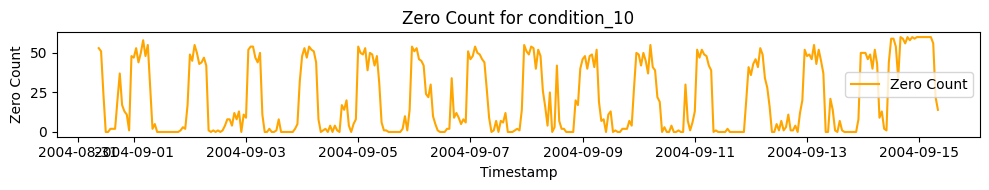

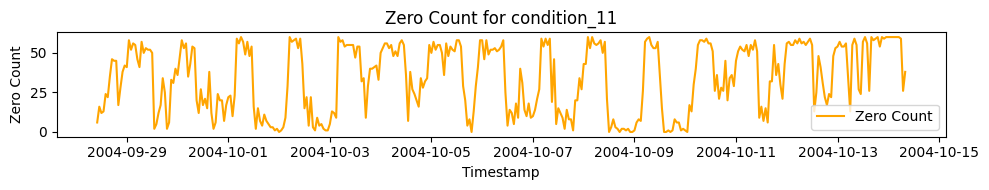

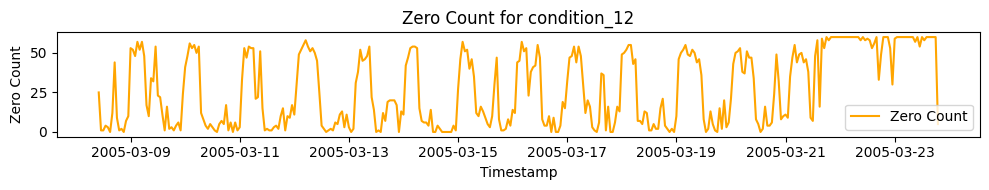

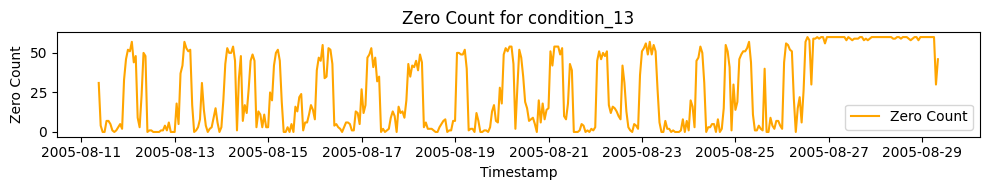

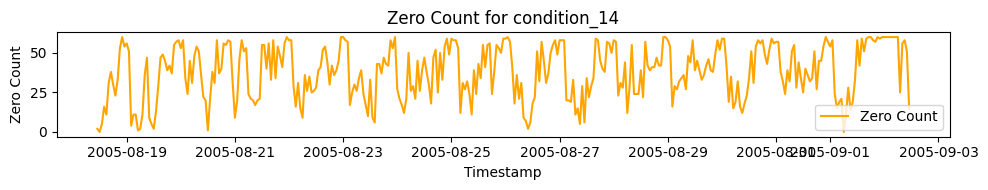

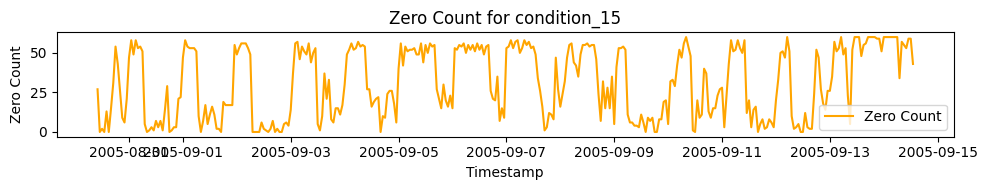

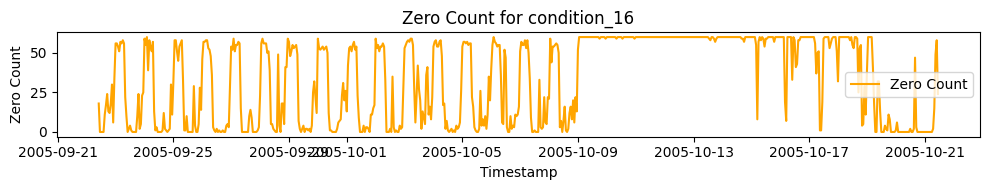

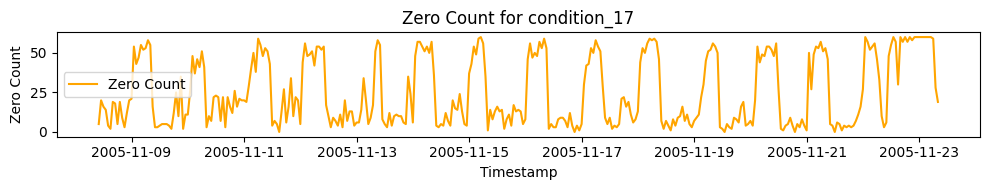

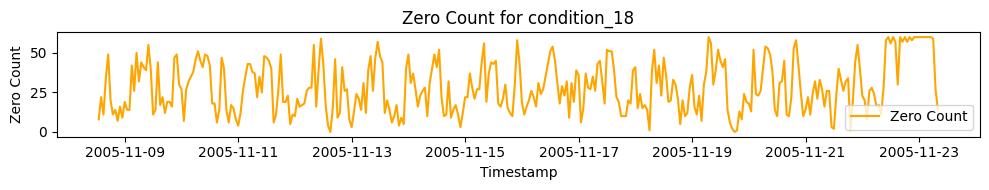

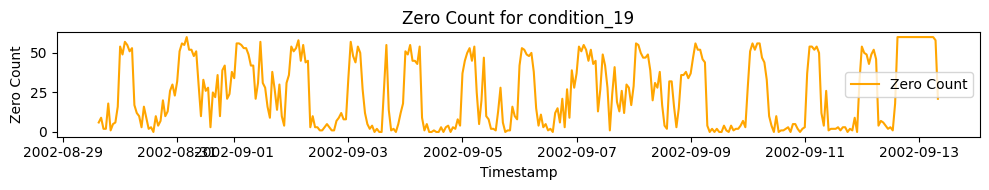

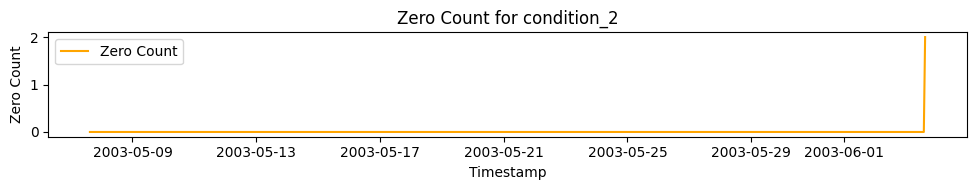

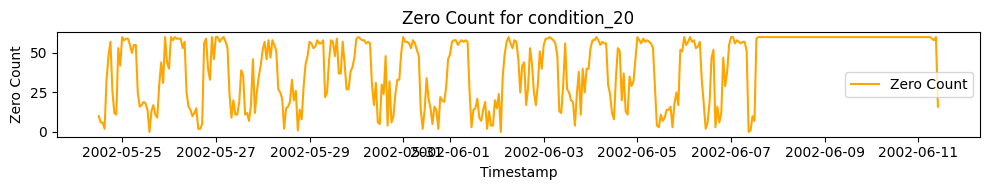

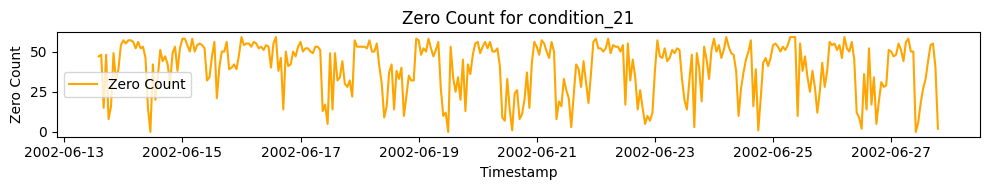

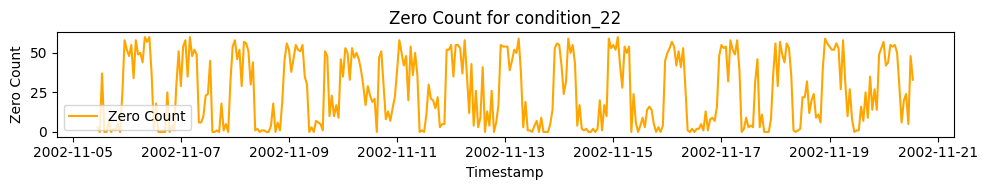

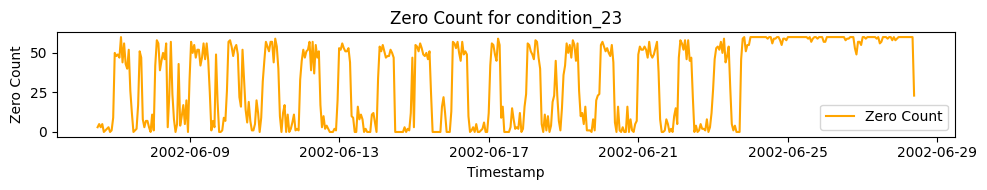

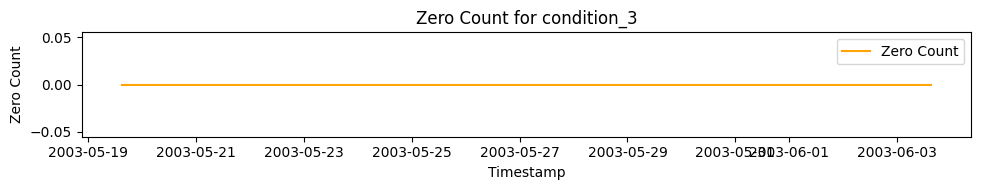

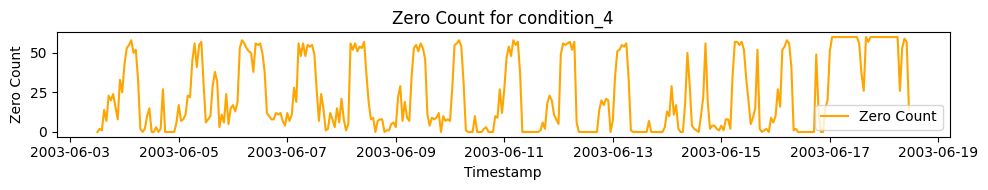

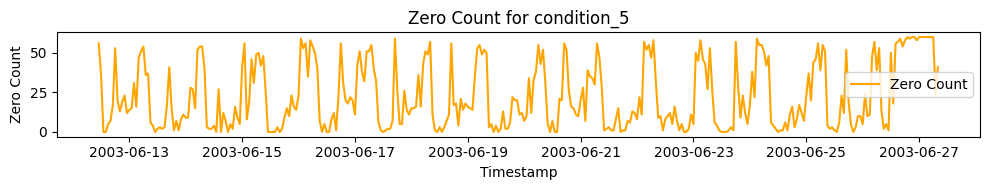

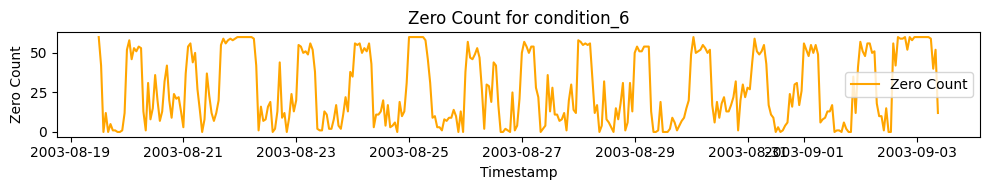

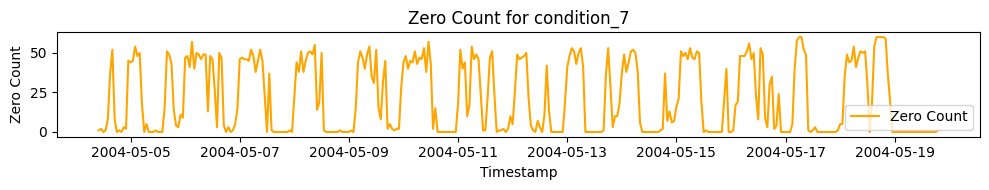

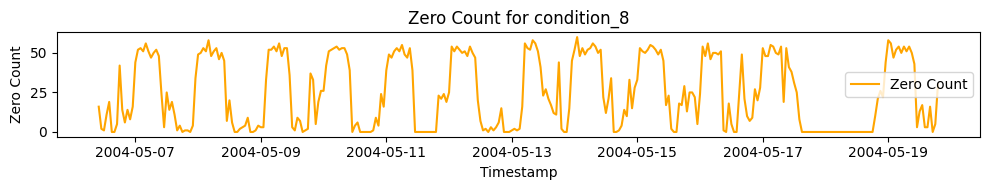

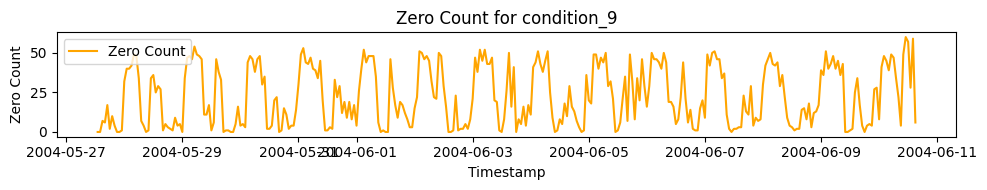

In [ ]:
for patient, data in cond_result_df.groupby('patient'):
    plt.figure(figsize=(10, 2))

    # Plot 'zero_count'
    plt.plot(data['ts'], data['zero_count'], label='Zero Count', color='orange')
    plt.title(f'Zero Count for {patient}')
    plt.xlabel('Timestamp')
    plt.ylabel('Zero Count')
    plt.legend()

    plt.tight_layout()
    plt.show()

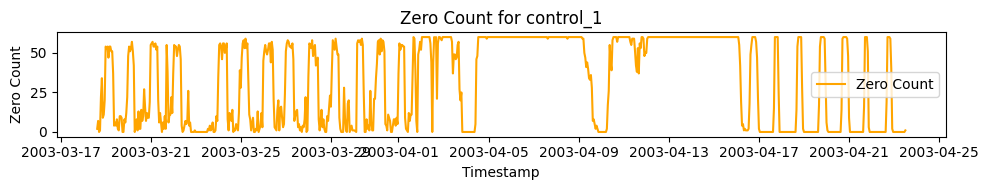

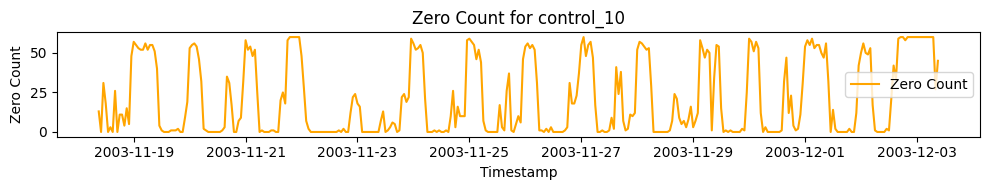

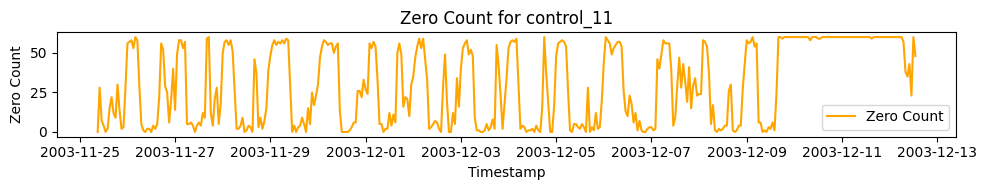

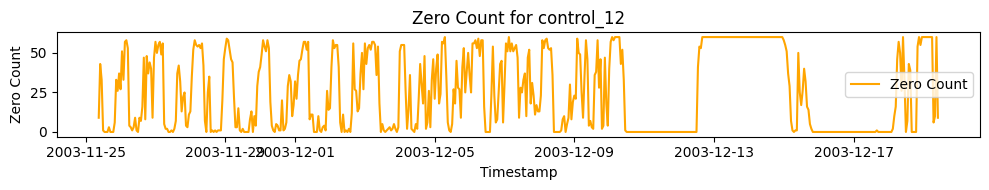

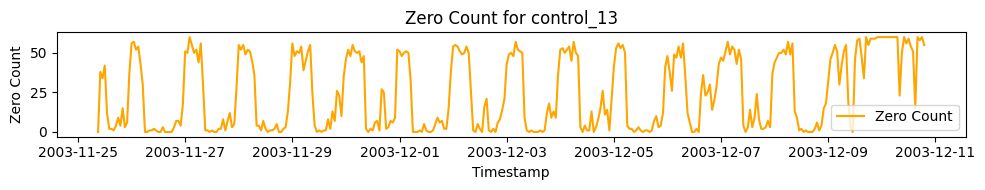

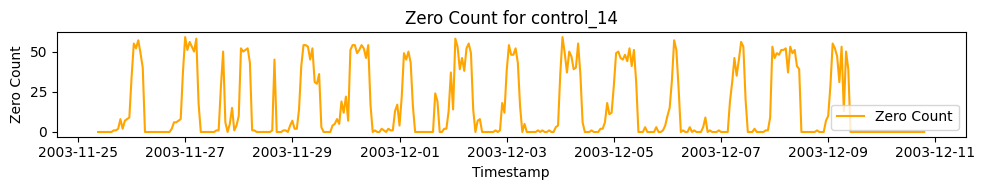

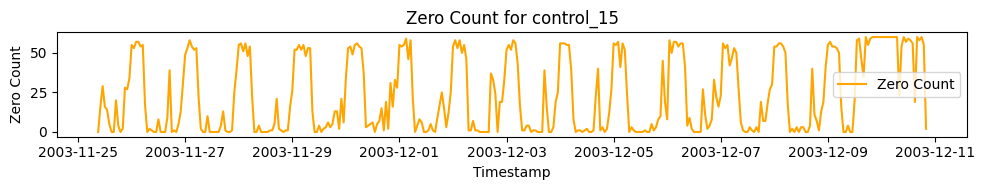

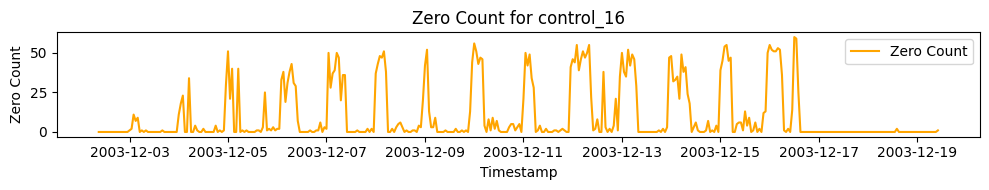

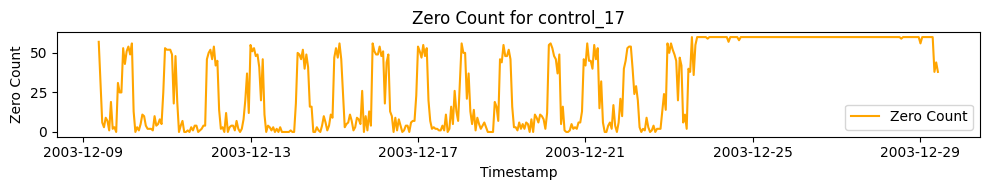

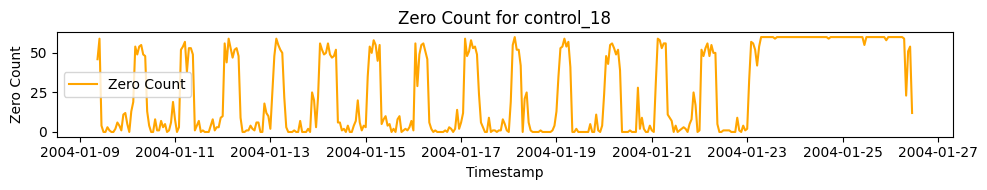

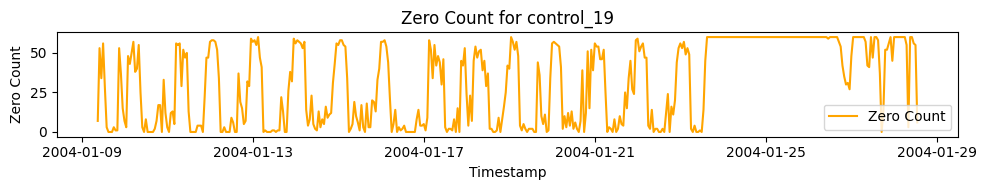

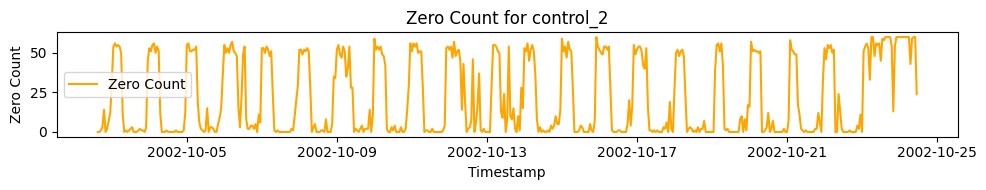

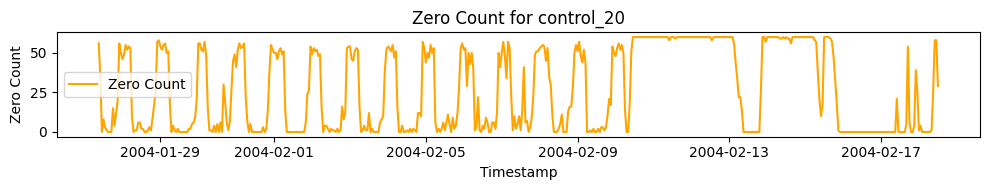

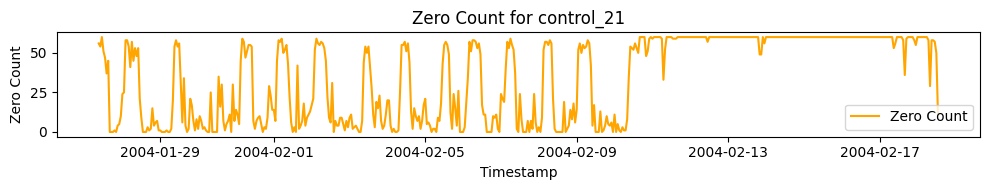

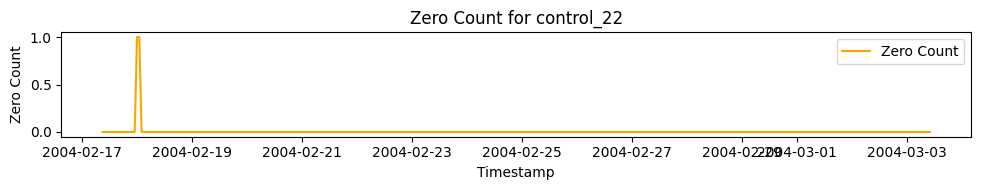

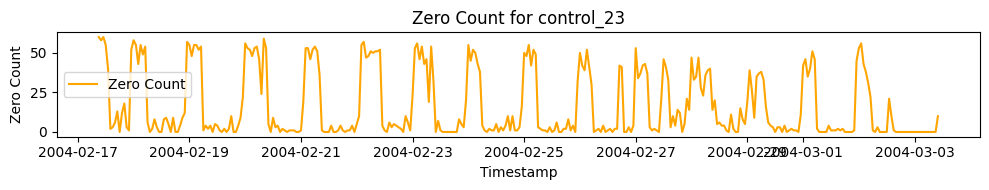

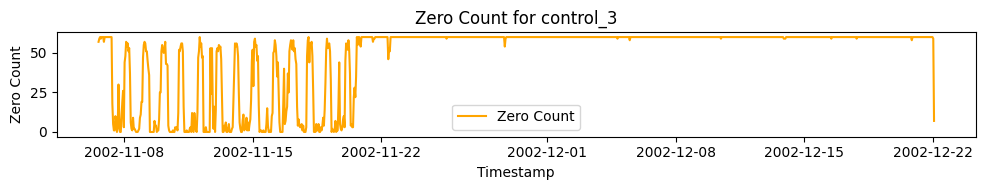

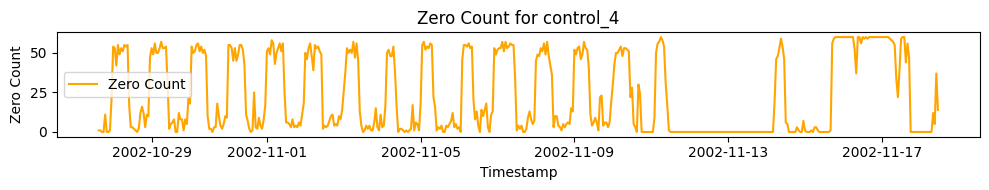

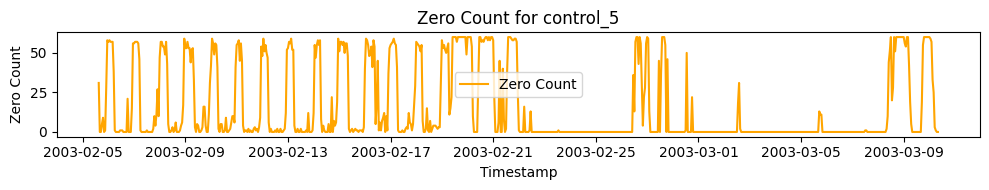

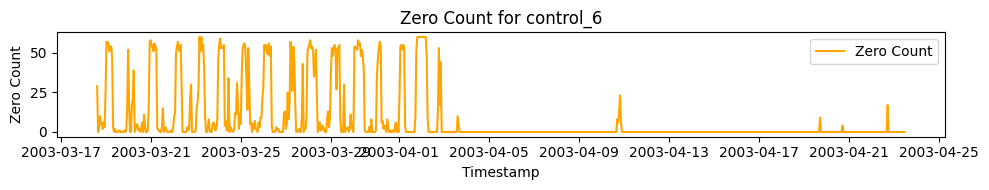

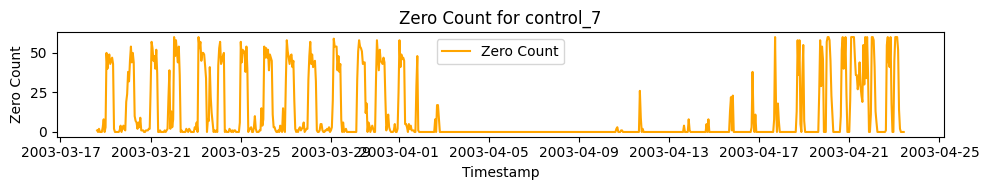

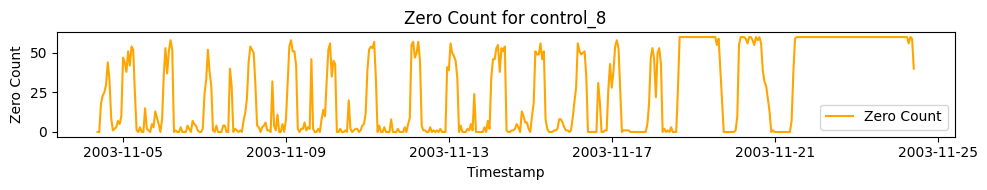

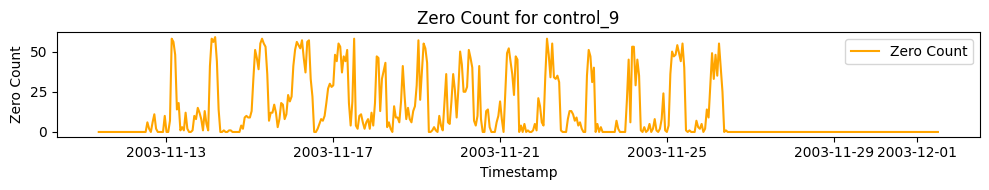

In [ ]:
for patient, data in cont_result_df.groupby('patient'):
    plt.figure(figsize=(10, 2))

    # Plot 'zero_count'
    plt.plot(data['ts'], data['zero_count'], label='Zero Count', color='orange')
    plt.title(f'Zero Count for {patient}')
    plt.xlabel('Timestamp')
    plt.ylabel('Zero Count')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
cond_result_df['hour'] = cond_result_df['ts'].dt.hour

# Group by hour and calculate the mean for each group
new_cond_df = cond_result_df.groupby(['hour']).agg(
    mean_activity=pd.NamedAgg(column='mean_activity', aggfunc='mean'),
    zero_count=pd.NamedAgg(column='zero_count', aggfunc='mean')
).reset_index()

In [ ]:
cont_result_df['hour'] = cont_result_df['ts'].dt.hour

# Group by hour and calculate the mean for each group
new_cont_df = cont_result_df.groupby(['hour']).agg(
    mean_activity=pd.NamedAgg(column='mean_activity', aggfunc='mean'),
    zero_count=pd.NamedAgg(column='zero_count', aggfunc='mean')
).reset_index()

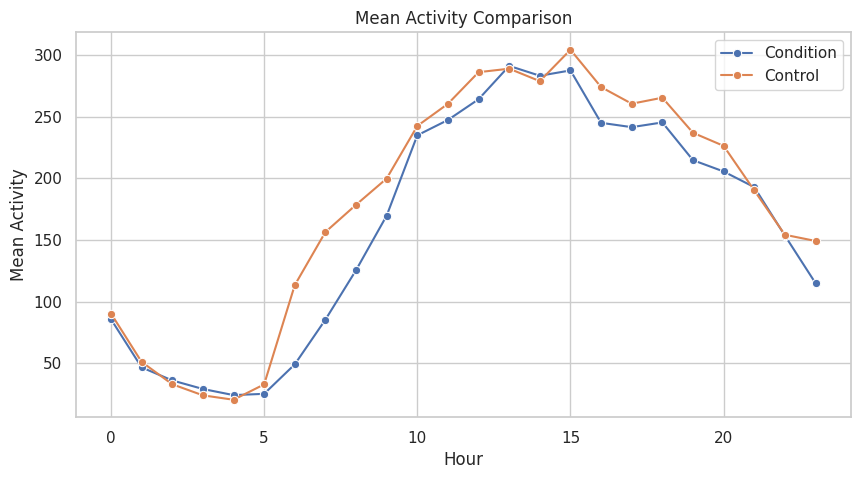

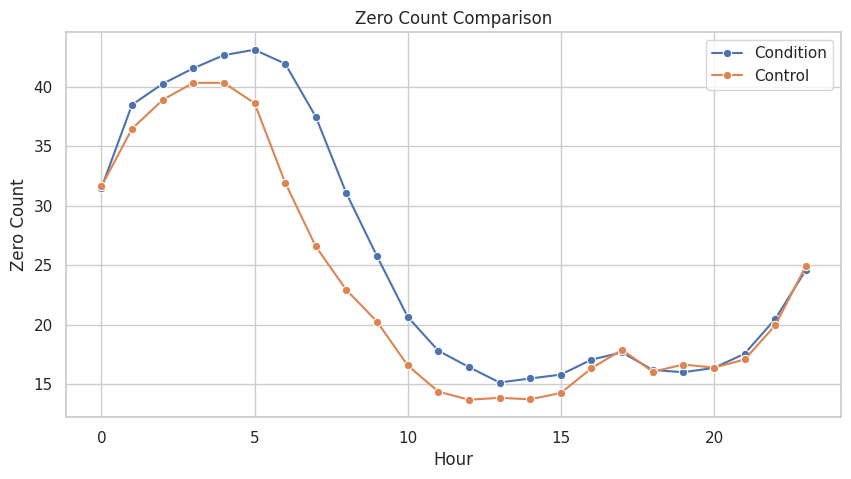

In [ ]:
sns.set(style="whitegrid")

# Create a line plot for Mean Activity
plt.figure(figsize=(10, 5))
sns.lineplot(x='hour', y='mean_activity', data=new_cond_df, label='Condition', marker='o')
sns.lineplot(x='hour', y='mean_activity', data=new_cont_df, label='Control', marker='o')
plt.title('Mean Activity Comparison')
plt.xlabel('Hour')
plt.ylabel('Mean Activity')
plt.legend()
plt.show()

# Create a line plot for Zero Count
plt.figure(figsize=(10, 5))
sns.lineplot(x='hour', y='zero_count', data=new_cond_df, label='Condition', marker='o')
sns.lineplot(x='hour', y='zero_count', data=new_cont_df, label='Control', marker='o')
plt.title('Zero Count Comparison')
plt.xlabel('Hour')
plt.ylabel('Zero Count')
plt.legend()
plt.show()

In [ ]:
cond_result_df['day'] = cond_result_df['ts'].dt.day

# Group by hour and calculate the mean for each group
new_cond_df = cond_result_df.groupby(['day']).agg(
    mean_activity=pd.NamedAgg(column='mean_activity', aggfunc='mean'),
    zero_count=pd.NamedAgg(column='zero_count', aggfunc='mean')
).reset_index()

In [ ]:
cont_result_df['day'] = cont_result_df['ts'].dt.day

# Group by hour and calculate the mean for each group
new_cont_df = cont_result_df.groupby(['day']).agg(
    mean_activity=pd.NamedAgg(column='mean_activity', aggfunc='mean'),
    zero_count=pd.NamedAgg(column='zero_count', aggfunc='mean')
).reset_index()

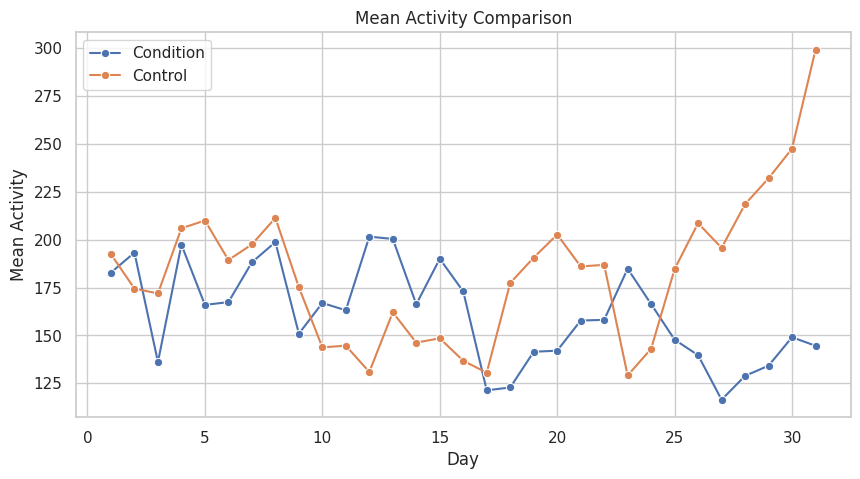

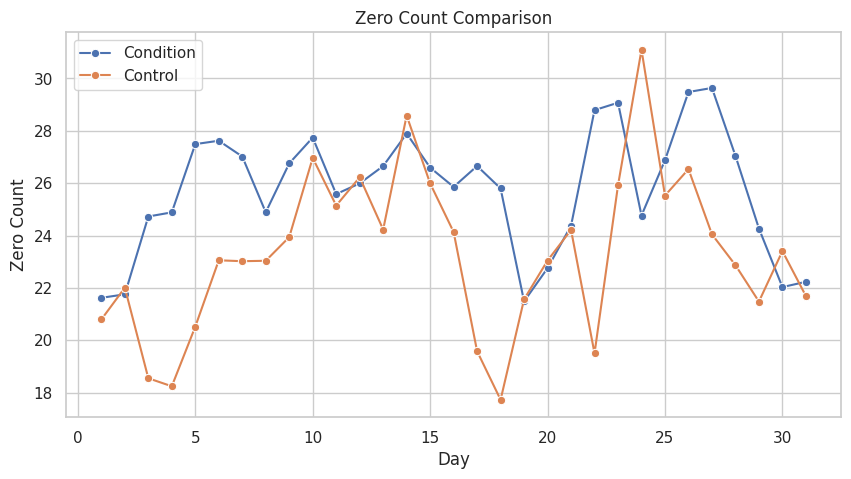

In [ ]:
sns.set(style="whitegrid")

# Create a line plot for Mean Activity
plt.figure(figsize=(10, 5))
sns.lineplot(x='day', y='mean_activity', data=new_cond_df, label='Condition', marker='o')
sns.lineplot(x='day', y='mean_activity', data=new_cont_df, label='Control', marker='o')
plt.title('Mean Activity Comparison')
plt.xlabel('Day')
plt.ylabel('Mean Activity')
plt.legend()
plt.show()

# Create a line plot for Zero Count
plt.figure(figsize=(10, 5))
sns.lineplot(x='day', y='zero_count', data=new_cond_df, label='Condition', marker='o')
sns.lineplot(x='day', y='zero_count', data=new_cont_df, label='Control', marker='o')
plt.title('Zero Count Comparison')
plt.xlabel('Day')
plt.ylabel('Zero Count')
plt.legend()
plt.show()

In [ ]:
def calculate_mean(df):
    return df.groupby(['day_of_week']).agg(
        mean_activity=pd.NamedAgg(column='mean_activity', aggfunc='mean'),
        zero_count=pd.NamedAgg(column='zero_count', aggfunc='mean')
    ).reset_index()

# Calculate day_of_week for both DataFrames
cont_result_df['day_of_week'] = cont_result_df['ts'].dt.dayofweek
cond_result_df['day_of_week'] = cond_result_df['ts'].dt.dayofweek

# Calculate mean for each DataFrame
new_cont_df = calculate_mean(cont_result_df)
new_cond_df = calculate_mean(cond_result_df)

# Convert day_of_week values to day names without using zip
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_mapping = dict(enumerate(day_names))

new_cont_df['day_of_week'] = new_cont_df['day_of_week'].map(day_mapping)
new_cond_df['day_of_week'] = new_cond_df['day_of_week'].map(day_mapping)

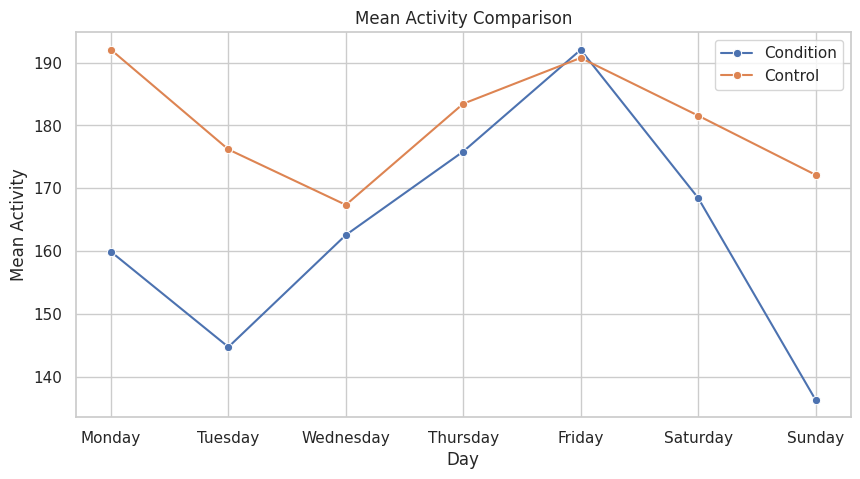

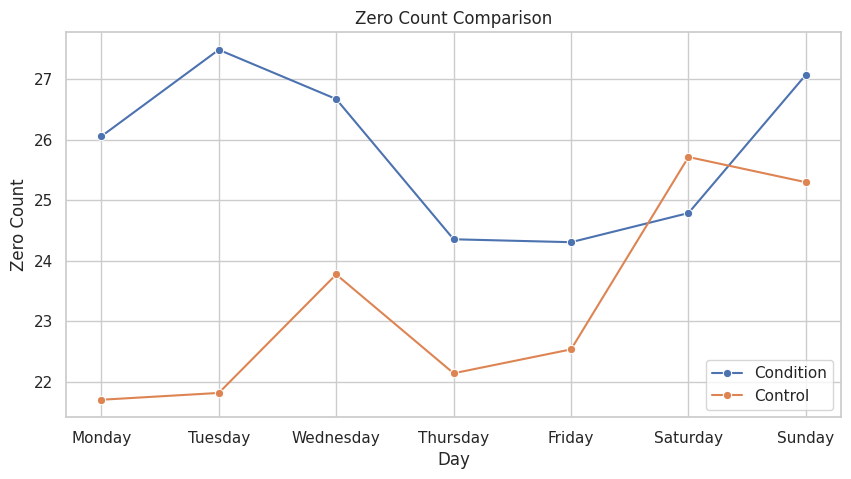

In [ ]:
sns.set(style="whitegrid")

# Create a line plot for Mean Activity
plt.figure(figsize=(10, 5))
sns.lineplot(x='day_of_week', y='mean_activity', data=new_cond_df, label='Condition', marker='o')
sns.lineplot(x='day_of_week', y='mean_activity', data=new_cont_df, label='Control', marker='o')
plt.title('Mean Activity Comparison')
plt.xlabel('Day')
plt.ylabel('Mean Activity')
plt.legend()
plt.show()

# Create a line plot for Zero Count
plt.figure(figsize=(10, 5))
sns.lineplot(x='day_of_week', y='zero_count', data=new_cond_df, label='Condition', marker='o')
sns.lineplot(x='day_of_week', y='zero_count', data=new_cont_df, label='Control', marker='o')
plt.title('Zero Count Comparison')
plt.xlabel('Day')
plt.ylabel('Zero Count')
plt.legend()
plt.show()

# **ML Models**

## **A. Predicting MADRS2 Score**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LogisticRegression, LinearRegression, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# Select relevant columns for training the model
selected_columns = ['gender', 'melanch', 'inpatient', 'madrs1']
X = condition_scores[selected_columns]
y = condition_scores['madrs2']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **1. Linear Regression Model**

In [ ]:
# Initialize and train the linear regression model
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_linear.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 7.174115397011368
R-squared: 0.4961997614458309


### **2. Ridge Regression Model**

In [ ]:
# Initialize and train the Ridge model
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_ridge.predict(X_test)

# Evaluate the Ridge model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 7.243487903035937
R-squared: 0.4913280966969146


### **3. Lasso Regression Model**

In [ ]:
# Initialize and train the Lasso model
model_lasso = Lasso(alpha=1.0)
model_lasso.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_lasso.predict(X_test)

# Evaluate the Lasso model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 8.454104760450353
R-squared: 0.40631286794590227


### **4. Gradient Boosting Regression Model**

In [ ]:
# Initialize and train the Gradient Boosting Regressor model
model_gb = GradientBoostingRegressor(random_state=42)
model_gb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_gb.predict(X_test)

# Evaluate the Gradient Boosting Regressor model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 8.251538657064074
R-squared: 0.4205380156556128


### **5. XGBoost Regression Model**

In [ ]:
# Initialize and train the XGBoost Regressor model
model_xgb = XGBRegressor(random_state=42)
model_xgb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_xgb.predict(X_test)

# Evaluate the XGBoost Regressor model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 8.429525342243869
R-squared: 0.4080389506851215


### **6. KNN Regression Model**

In [ ]:
# Initialize and train the K-Nearest Neighbors Regressor model
model_knn_1 = KNeighborsRegressor(n_neighbors=10)
model_knn_1.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = model_knn_1.predict(X_test)

# Evaluate the K-Nearest Neighbors Regressor model
mse = mean_squared_error(y_test, y_pred_knn)
r2 = r2_score(y_test, y_pred_knn)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 5.711999999999999
R-squared: 0.5988764044943822


## **Comparison Table:**
```markdown
Regression Model Name   | Linear     | Ridge      | Lasso      | Gradient Boost | XGBoosting | KNN
------------------------|------------|------------|------------|----------------|------------|------------
MSE                     | 7.1741     | 7.2434     | 8.4541     | 8.2515         | 8.4295     | 5.7119
R-squared               | 0.4961     | 0.4913     | 0.4063     | 0.4205         | 0.4080     | 0.5988

```

## **B. Predicting If Depression or Not**

**Implementing PCA**

In [ ]:
controls_data = pd.DataFrame()
for i in range(1, 33):
    patient_data = pd.read_csv(f'/content/data/control/control_{i}.csv', parse_dates=['timestamp'])
    patient_data['depressed'] = 0  # 0 indicates not depressed
    controls_data = pd.concat([controls_data, patient_data])

condition_data = pd.DataFrame()
for i in range(1, 24):
    patient_data = pd.read_csv(f'/content/data/condition/condition_{i}.csv', parse_dates=['timestamp'])
    patient_data['depressed'] = 1  # 1 indicates depressed
    condition_data = pd.concat([condition_data, patient_data])

# Combine the data
combined_data = pd.concat([controls_data, condition_data])

# Extract features from the timestamp
combined_data['year'] = combined_data['timestamp'].dt.year
combined_data['month'] = combined_data['timestamp'].dt.month
combined_data['day'] = combined_data['timestamp'].dt.day
combined_data['hour'] = combined_data['timestamp'].dt.hour
combined_data['minute'] = combined_data['timestamp'].dt.minute

# Select features and target variable
X = combined_data[['year', 'month', 'day', 'hour', 'minute', 'activity']]
y = combined_data['depressed']

# Standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)

# Apply PCA for dimensionality reduction
num_components = 6
pca = PCA(n_components=num_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

Importing ML libraries for prediction

In [ ]:
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import cross_val_predict

###**K-Means Clustering**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


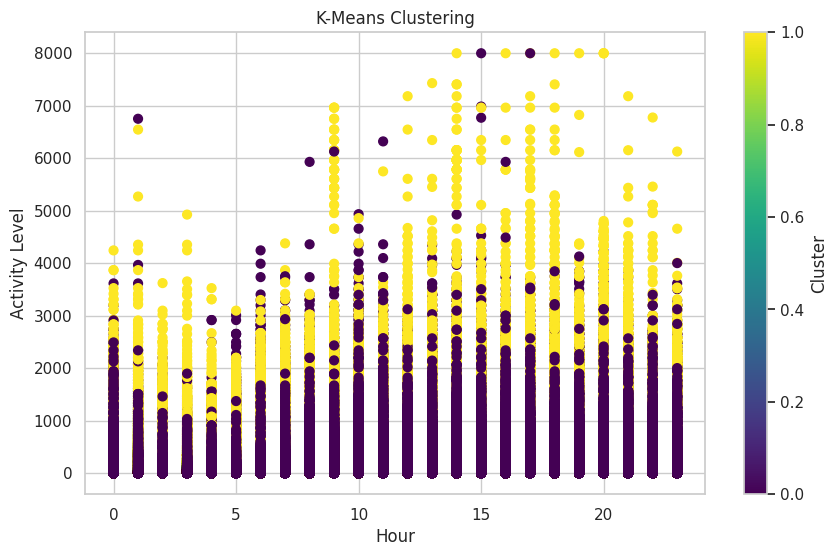

In [ ]:
# Select features for clustering
X_for_clustering = combined_data[['year', 'month', 'day', 'hour', 'minute', 'activity']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_for_clustering)

# Create a KMeans model
kmeans = KMeans(n_clusters=2, random_state=42)  # Adjust the number of clusters as needed

# Fit the KMeans model
kmeans_labels = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original DataFrame
combined_data['cluster'] = kmeans_labels

# Plot the clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(combined_data['hour'], combined_data['activity'], c=kmeans_labels, cmap='viridis', s=40)
plt.title('K-Means Clustering')
plt.xlabel('Hour')
plt.ylabel('Activity Level')
plt.colorbar(scatter, label='Cluster')
plt.show()

## **1. Logistic Regression Model**

In [ ]:
# Create a logistic regression model
model_logi = LogisticRegression()

# Train the model on the reduced feature set
model_logi.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = model_logi.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.7302301315128109
Confusion Matrix:
[[199390   4092]
 [ 80708  30152]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.98      0.82    203482
           1       0.88      0.27      0.42    110860

    accuracy                           0.73    314342
   macro avg       0.80      0.63      0.62    314342
weighted avg       0.77      0.73      0.68    314342



## **2. Naive Bayes Classifier**

In [ ]:
# Create a Naive Bayes Classifier model
model_nb = GaussianNB()

# Train the Naive Bayes model
model_nb.fit(X_train_pca, y_train)

# Make predictions on the test set
y_nb_pred = model_nb.predict(X_test_pca)

# Evaluate the Naive Bayes model
nb_accuracy = accuracy_score(y_test, y_nb_pred)
nb_conf_matrix = confusion_matrix(y_test, y_nb_pred)
nb_classification_rep = classification_report(y_test, y_nb_pred)

print(f"Naive Bayes Accuracy: {nb_accuracy}")
print(f"Naive Bayes Confusion Matrix:\n{nb_conf_matrix}")
print(f"Naive Bayes Classification Report:\n{nb_classification_rep}")

Naive Bayes Accuracy: 0.7184785997416826
Naive Bayes Confusion Matrix:
[[188803  14679]
 [ 73815  37045]]
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.93      0.81    203482
           1       0.72      0.33      0.46    110860

    accuracy                           0.72    314342
   macro avg       0.72      0.63      0.63    314342
weighted avg       0.72      0.72      0.69    314342



## **3. k-Nearest Neighbour Classifier**

In [ ]:
# Create a k-Nearest Neighbors (KNN) Classifier model
model_knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
model_knn.fit(X_train_pca, y_train)

# Make predictions on the test set
y_knn_pred = model_knn.predict(X_test_pca)

# Evaluate the KNN model
knn_accuracy = accuracy_score(y_test, y_knn_pred)
knn_conf_matrix = confusion_matrix(y_test, y_knn_pred)
knn_classification_rep = classification_report(y_test, y_knn_pred)

print(f"KNN Accuracy: {knn_accuracy}")
print(f"KNN Confusion Matrix:\n{knn_conf_matrix}")
print(f"KNN Classification Report:\n{knn_classification_rep}")

KNN Accuracy: 0.9737451565492362
KNN Confusion Matrix:
[[199659   3823]
 [  4430 106430]]
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98    203482
           1       0.97      0.96      0.96    110860

    accuracy                           0.97    314342
   macro avg       0.97      0.97      0.97    314342
weighted avg       0.97      0.97      0.97    314342



## **4. Random Forest Classifier**

In [ ]:
# Create a Random Forest Classifier model
model_rf = RandomForestClassifier(random_state=42)

# Train the model
model_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.9769773049735638
Confusion Matrix:
[[199882   3600]
 [  3637 107223]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98    203482
           1       0.97      0.97      0.97    110860

    accuracy                           0.98    314342
   macro avg       0.97      0.97      0.97    314342
weighted avg       0.98      0.98      0.98    314342



## **5. Random Forest Classifier with Cross Validation**

In [ ]:
# Create a Random Forest Classifier model with Cross Validation
model_rf_cv = RandomForestClassifier(random_state=42)

# Use k-fold cross-validation
kfold = KFold(n_splits=7, shuffle=True, random_state=42)
scores = cross_val_score(model_rf_cv, X, y, cv=kfold, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

# Use k-fold cross-validation and get predicted labels
predicted_labels = cross_val_predict(model_rf_cv, X, y, cv=kfold)

# Print the classification report
print("Classification Report:")
print(classification_report(y, predicted_labels))

Cross-Validation Scores: [0.9767069  0.97686278 0.97675589 0.97704528 0.97750847 0.97726797
 0.9771878 ]
Mean Accuracy: 0.9770478707964741
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98   1019990
           1       0.97      0.97      0.97    551716

    accuracy                           0.98   1571706
   macro avg       0.97      0.97      0.97   1571706
weighted avg       0.98      0.98      0.98   1571706



## **6. Artificial Neural Network Model**

In [ ]:
# Define the ANN model
model_ann = Sequential()

# Add input layer
model_ann.add(Dense(units=64, activation='relu', input_dim=num_components))

# Add hidden layers
model_ann.add(Dense(units=32, activation='relu'))
model_ann.add(Dense(units=16, activation='relu'))

# Add output layer
model_ann.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model_ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the training data
model_ann.fit(X_train_pca, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Make predictions on the test set
y_ann_pred = (model_ann.predict(X_test_pca) > 0.5).astype(int)

# Evaluate the ANN model
ann_accuracy = accuracy_score(y_test, y_ann_pred)
ann_conf_matrix = confusion_matrix(y_test, y_ann_pred)
ann_classification_rep = classification_report(y_test, y_ann_pred)

print(f"ANN Accuracy: {ann_accuracy}")
print(f"ANN Confusion Matrix:\n{ann_conf_matrix}")
print(f"ANN Classification Report:\n{ann_classification_rep}")

Epoch 1/10
31435/31435 [==============================] - 112s 4ms/step - loss: 0.0570 - accuracy: 0.9731 - val_loss: 0.0473 - val_accuracy: 0.9761
Epoch 2/10
31435/31435 [==============================] - 108s 3ms/step - loss: 0.0473 - accuracy: 0.9759 - val_loss: 0.0467 - val_accuracy: 0.9760
Epoch 3/10
31435/31435 [==============================] - 121s 4ms/step - loss: 0.0461 - accuracy: 0.9762 - val_loss: 0.0445 - val_accuracy: 0.9771
Epoch 4/10
31435/31435 [==============================] - 101s 3ms/step - loss: 0.0453 - accuracy: 0.9766 - val_loss: 0.0439 - val_accuracy: 0.9770
Epoch 5/10
31435/31435 [==============================] - 92s 3ms/step - loss: 0.0448 - accuracy: 0.9769 - val_loss: 0.0440 - val_accuracy: 0.9768
Epoch 6/10
31435/31435 [==============================] - 98s 3ms/step - loss: 0.0446 - accuracy: 0.9770 - val_loss: 0.0454 - val_accuracy: 0.9769
Epoch 7/10
31435/31435 [==============================] - 108s 3ms/step - loss: 0.0443 - accuracy: 0.9772 - val_lo

9824/9824 [==============================] - 18s 2ms/step


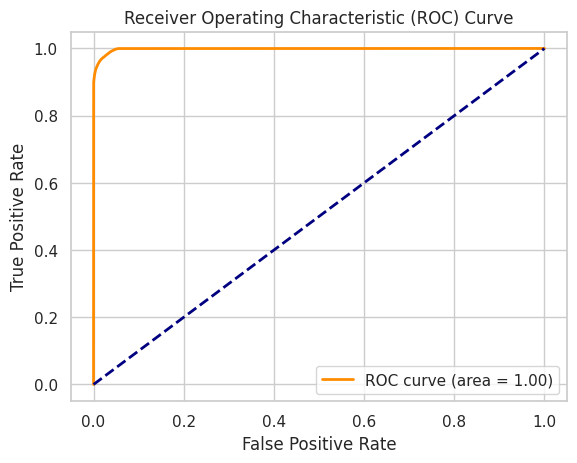

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, model_ann.predict(X_test_pca))
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## **Comparison Table:**
```markdown
Model Name   | Logistic | Naive Bayes | KNN Model | Random Forest (CV) | ANN Model
-------------|----------|-------------|-----------|--------------------|------------
Accuracy     | 0.730    | 0.718       | 0.974     | 0.976              | 0.978
Precision    | 0.88     | 0.72        | 0.97      | 0.97               | 0.98
Recall       | 0.27     | 0.33        | 0.96      | 0.97               | 0.96
F1-score     | 0.42     | 0.46        | 0.96      | 0.97               | 0.97

```